## Step 1: Reading and Understanding the Data

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
# Load dataset and preview first two rows
lead= pd.read_csv("OneDrive/Leads.csv") 
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Get the number of rows and columns in the dataset
lead.shape

(9240, 37)

In [4]:
# Creates a copy of the 'lead' DataFrame
lead_original= lead.copy()

In [5]:
# Displays information about the 'lead' DataFrame
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Percentage of missing values in each column
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
# list all numeric and non-numeric columns
nonnumcols = list(lead.select_dtypes(include="object"))
numcols = list(lead.select_dtypes(exclude="object"))
len(nonnumcols),len(numcols)

(30, 7)

In [8]:
# Count for all categorical columns
for col in nonnumcols:
    print("-"*50)
    print(col)
    print(lead[col].nunique())

--------------------------------------------------
Prospect ID
9240
--------------------------------------------------
Lead Origin
5
--------------------------------------------------
Lead Source
21
--------------------------------------------------
Do Not Email
2
--------------------------------------------------
Do Not Call
2
--------------------------------------------------
Last Activity
17
--------------------------------------------------
Country
38
--------------------------------------------------
Specialization
19
--------------------------------------------------
How did you hear about X Education
10
--------------------------------------------------
What is your current occupation
6
--------------------------------------------------
What matters most to you in choosing a course
3
--------------------------------------------------
Search
2
--------------------------------------------------
Magazine
1
--------------------------------------------------
Newspaper Article
2
-----

In [9]:
# Iterates over non-numeric columns (excluding 'Prospect ID') and print value counts
for col in [col for col in nonnumcols if col != "Prospect ID"]:
    print("-"*50)
    print(col)
    print(lead[col].value_counts())

--------------------------------------------------
Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--------------------------------------------------
Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
--------------------------------------------------
Do Not Email
Do Not Email
No     8506
Yes

In [10]:
# Replace 'google' with 'Google' in the 'Lead Source' column
lead["Lead Source"] = lead["Lead Source"].replace("google", "Google")

## Step 2: Data Cleaning

In [11]:
lead.loc[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


* No duplicates present in the data 

In [12]:
# To check for duplicates in columns
print(sum(lead.duplicated(subset = 'Lead Number')))
print(sum(lead.duplicated(subset = 'Prospect ID')))

0
0


* The values in these columns vary for each entry or row and primarily serve as identifiers. Since they do not contribute to the analysis, they can be safely dropped.

In [13]:
# Dropping identifier columns
lead= lead.drop(['Lead Number','Prospect ID'],axis=1)


* 'Select' appears to be the default value stored in the backend for optional columns 
   when the customer has not chosen any of the available options from the dropdown menu.

In [14]:
# To convert 'Select' values to NaN
lead = lead.replace('Select', np.nan)

In [15]:
# To get percentage of null values in each column
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

* We will drop columns with more than 50% missing values, 
  as imputing such a large amount doesn’t make sense.
  However, the variable 'Lead Quality', with 51.6% missing values, appears significant for the analysis, 
  so we will retain it for now.

In [16]:
# Dropping columns with more than 50% missing values, as imputing such a large number of values is not meaningful.
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>52)].columns, axis=1)

In [17]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

*  For the remaining columns, we will handle each one individually.
*  For categorical variables, we will analyze the count and percentage distributions through visual plots.
*  For numerical variables, we will calculate descriptive statistics and evaluate their distributions using box plots.

In [18]:
# Function for percentage plots
def percent_plot(var):
    values = (lead[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

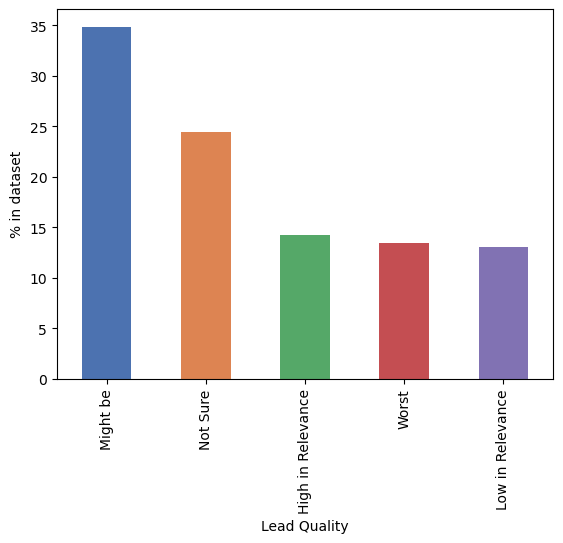

In [19]:

# For Lead Quality
percent_plot('Lead Quality')

* Null values in the 'Lead Quality' column can be replaced with 'Not Sure', as it can be assumed that a blank entry signifies the employee is uncertain or lacks knowledge about the option.

In [20]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

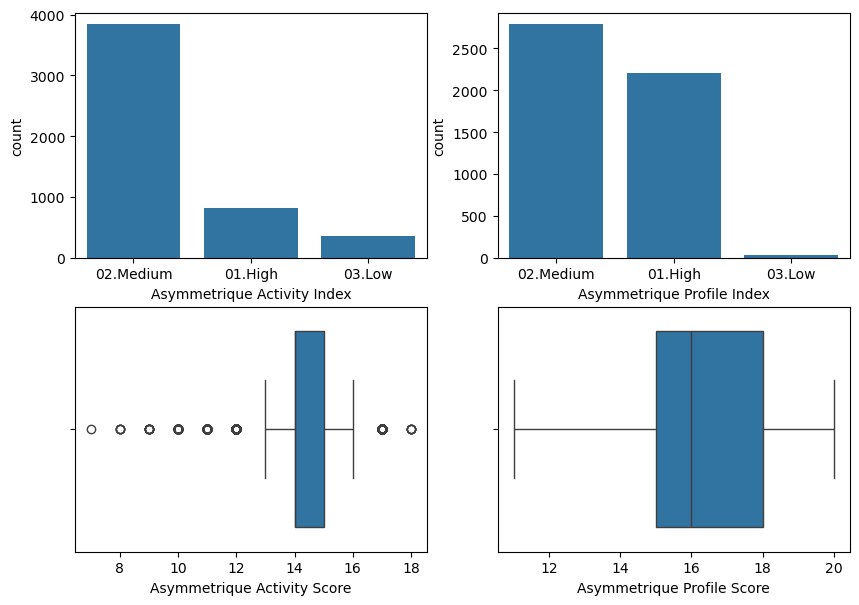

In [21]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(data=lead, x=var)
    else:
        sns.boxplot(data=lead, x=var)
plt.show()

In [22]:
# To describe numerical variables
lead[asym_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


* These four variables have over 45% missing values, and the plots show significant variation in them. Imputing 45% of the data doesn't seem practical, as even if we impute with mean or median for numerical variables, these values will not add meaningful value to the model. Therefore, we will drop these variables.

In [23]:
lead=lead.drop(asym_list,axis=1)

In [24]:
# To see percentage of null values in each column
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

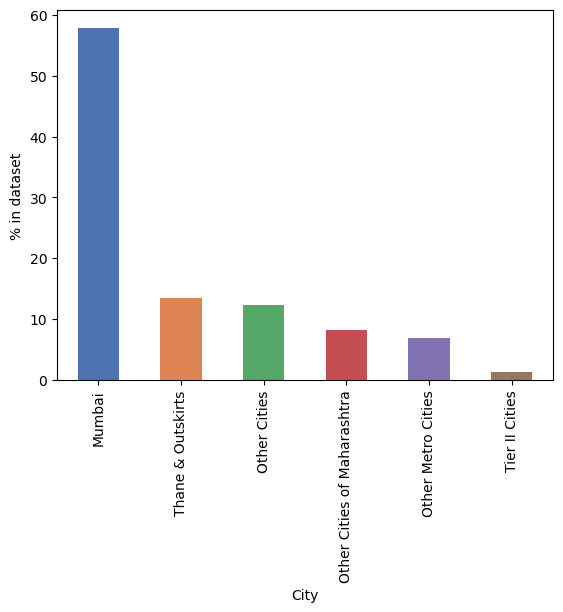

In [25]:
# For 'City'
percent_plot('City')

* Since around 60% of the 'City' values are Mumbai, we can fill the missing values with 'Mumbai'.

In [26]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

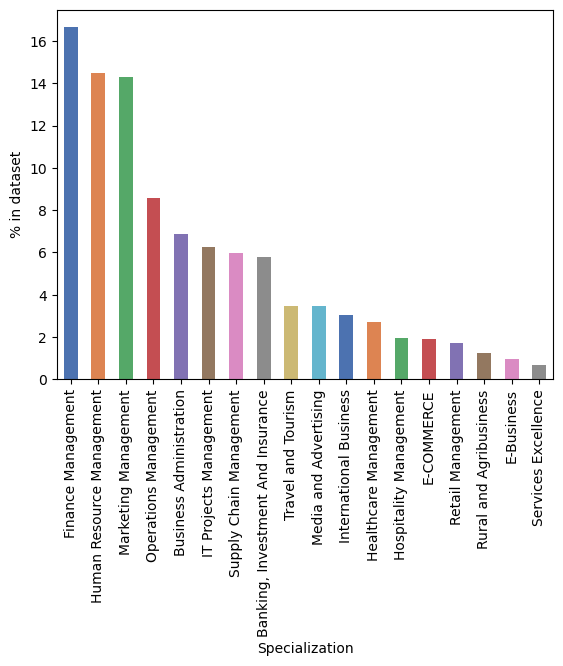

In [27]:
# For 'Specialization'
percent_plot('Specialization')

* There are many different specializations, and directly imputing with the mean may not be accurate. It's possible that the person does not have a specialization, or their specialization is not listed among the options. We can create a new column to account for this.

In [28]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')


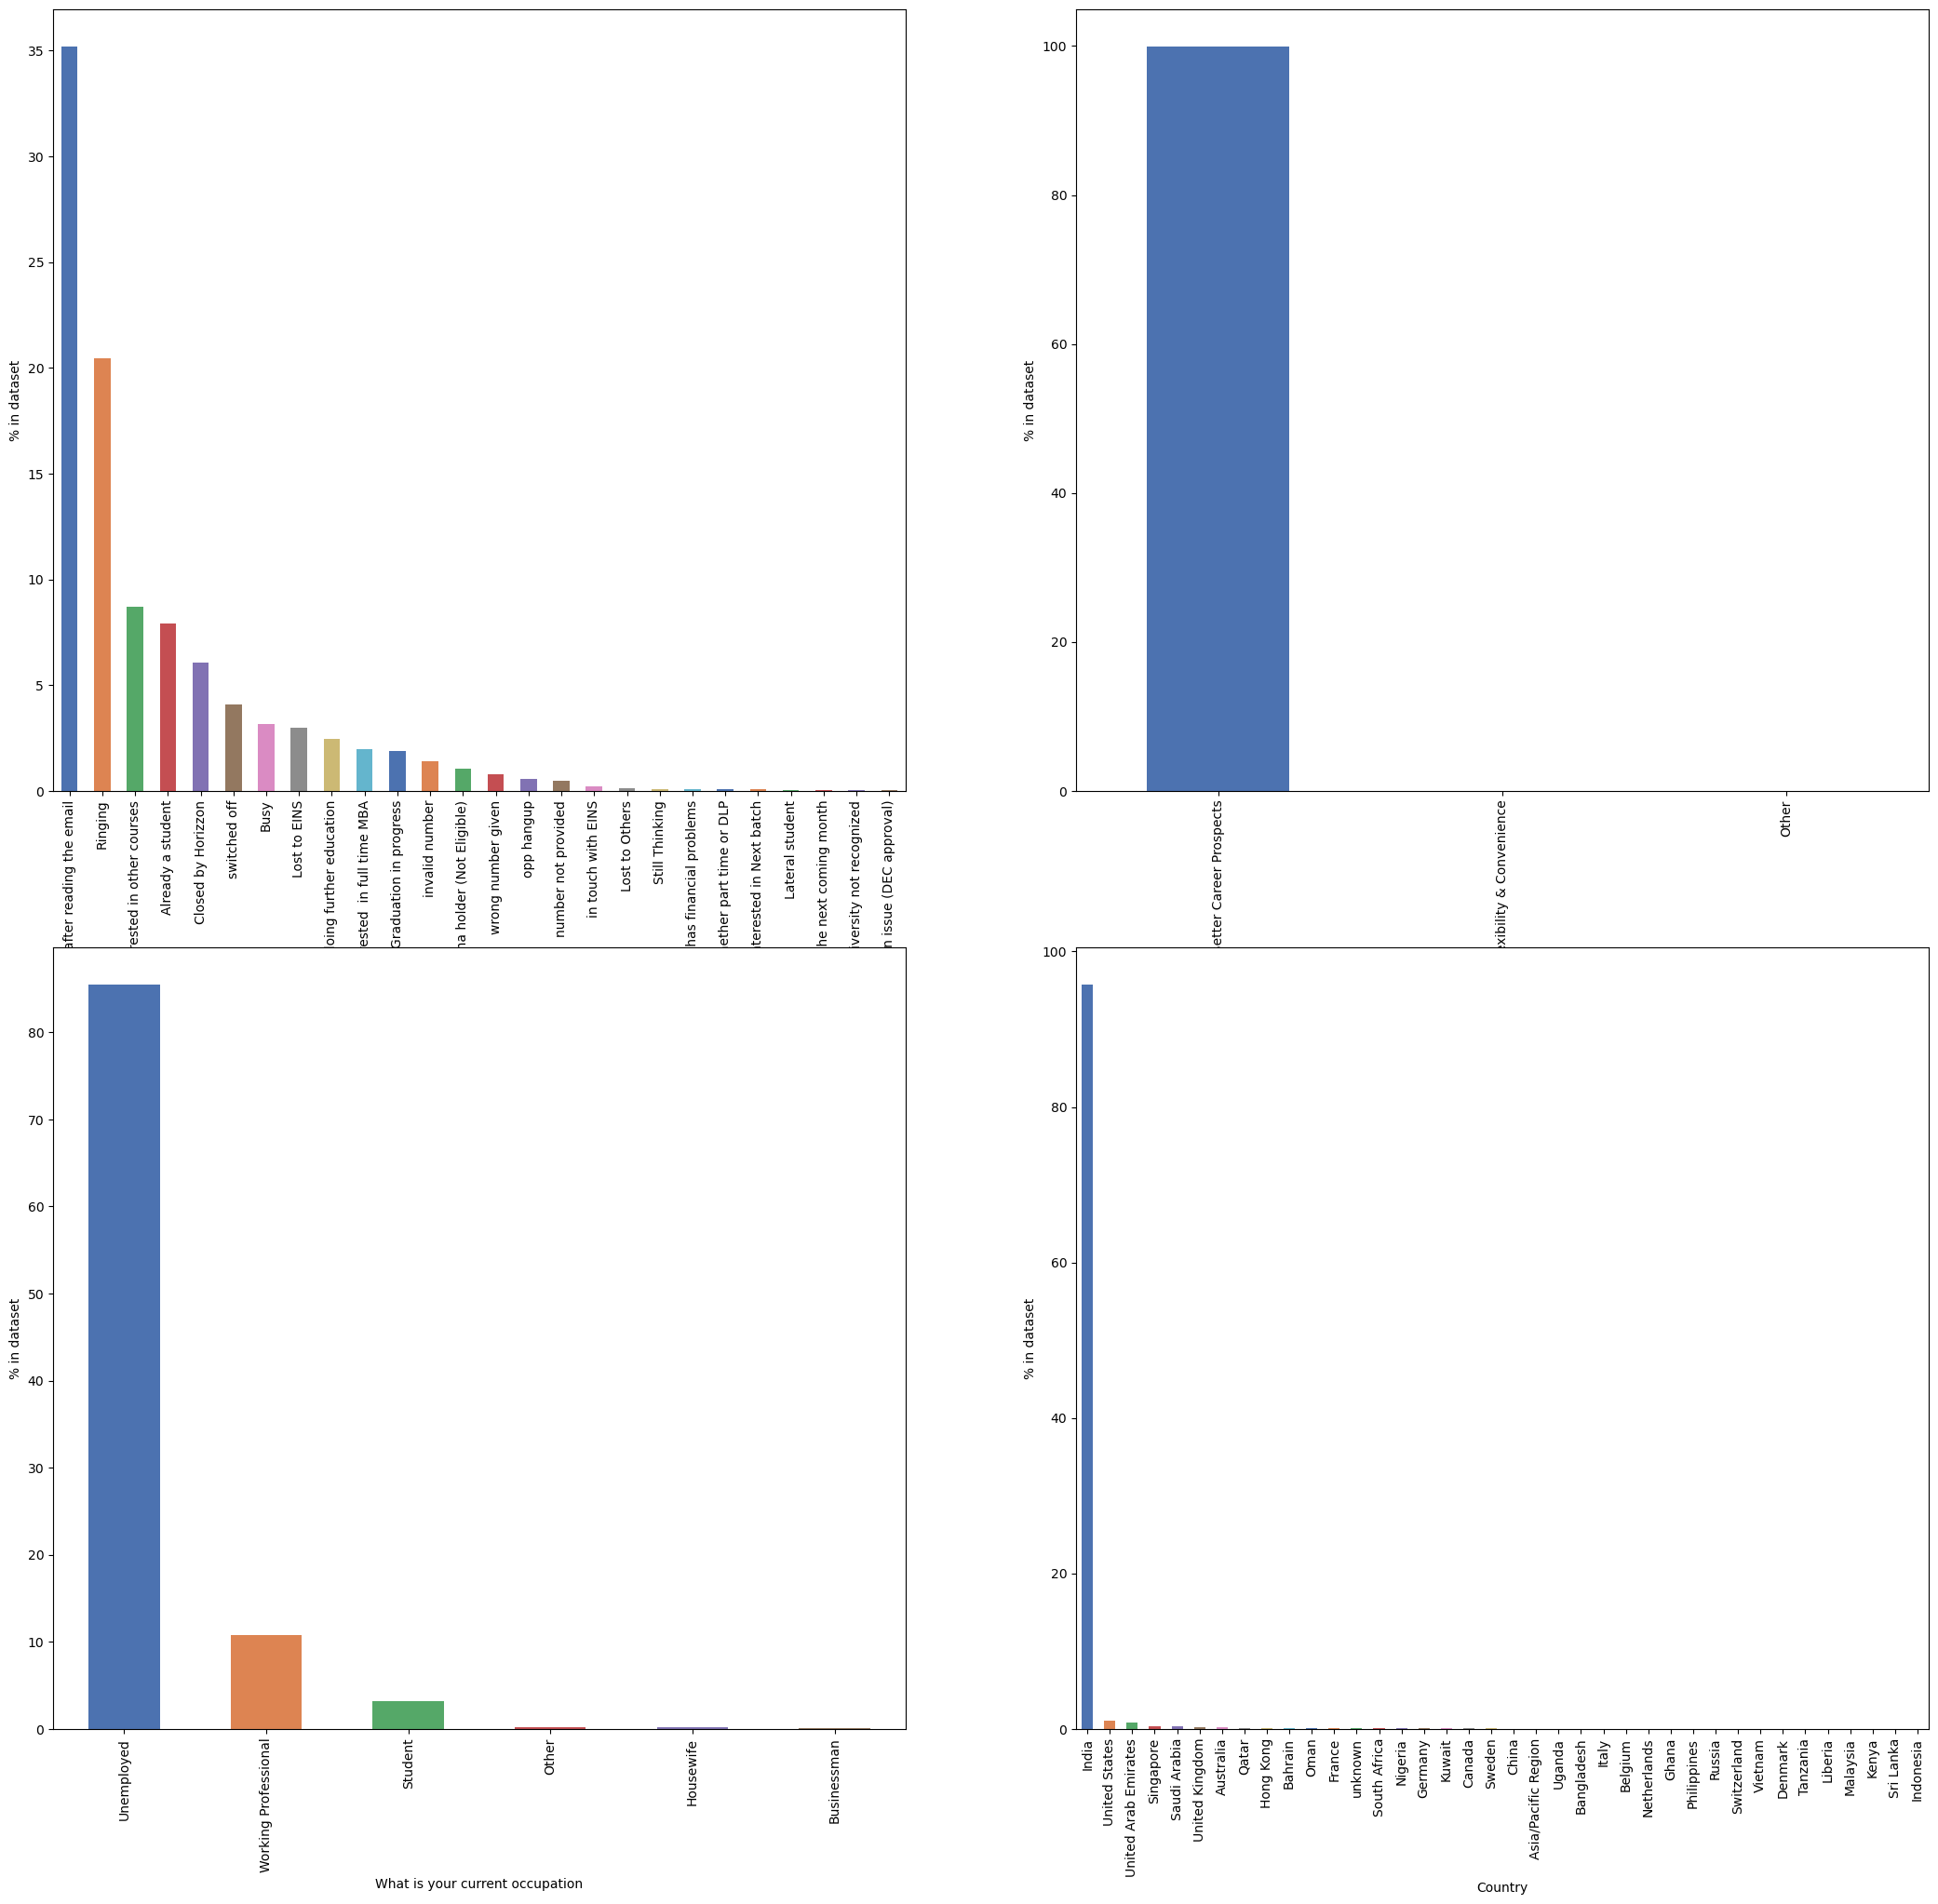

In [29]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']
plt.figure(figsize=(26, 24))
for var in var_list:
    plt.subplot(2,2,var_list.index(var)+1)
    percent_plot(var)

* In these categorical variables, one value is clearly more frequent than the others, making it logical to impute the missing values with the most frequent value.

In [30]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = lead[var].describe()['top']
    lead[var] = lead[var].replace(np.nan, top_frequent)

In [31]:
# Let's see percentage of null values in each column
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

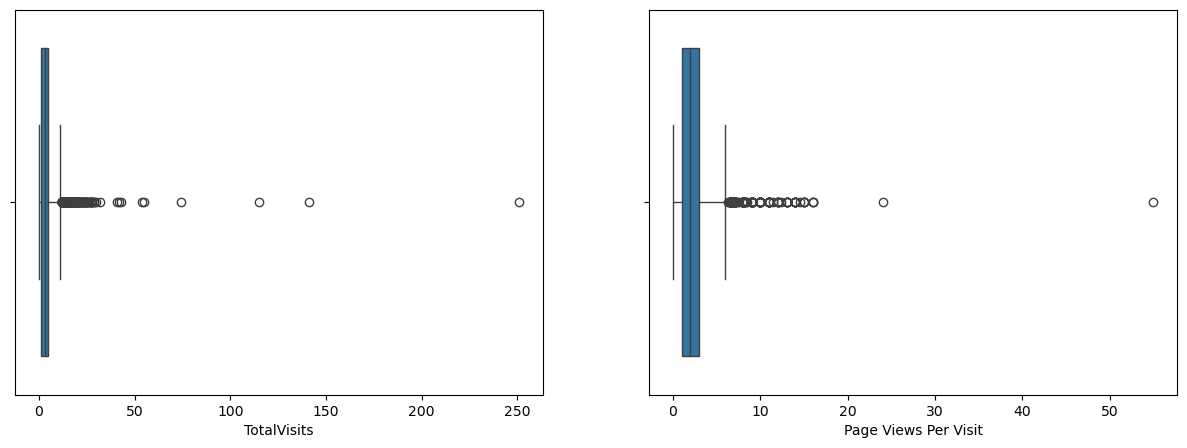

In [32]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(data=lead, x=var)
plt.show()
     

In [33]:
lead[visit_list].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


* Based on the above analysis, it is clear that both variables exhibit significant variation. Since the percentage of missing values for each is less than 2%, it is more practical to drop the rows with missing values.

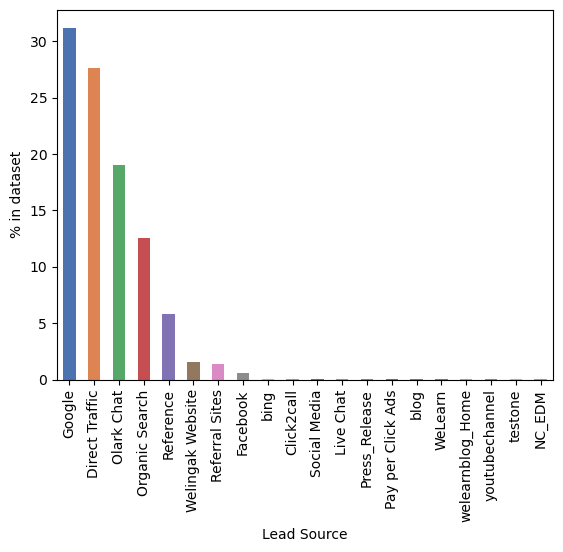

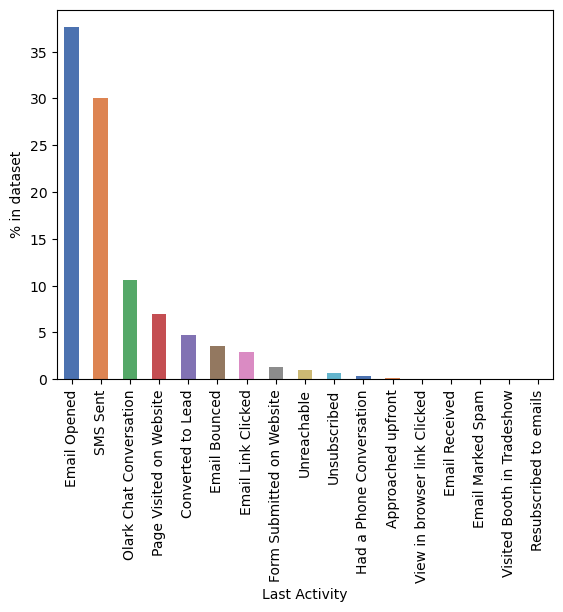

In [34]:

# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

* For these categorical variables, imputing with the most frequent value is not suitable, as the next most frequent value has a similar frequency. Additionally, since the percentage of missing values is minimal, it is more appropriate to drop the rows with missing values. Therefore, we will remove any rows containing missing values for the above four variables.

In [35]:
# To drop the rows containing missing values
lead.dropna(inplace = True)

In [36]:
# Let's see percentage of null values in each column
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

* All missing values have been successfully addressed.

In [37]:
# list all numeric and non-numeric columns
nonnumcols = list(lead.select_dtypes(include="object"))
numcols = list(lead.select_dtypes(exclude="object"))
len(nonnumcols),len(numcols)

(25, 4)

In [38]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

## Step 3: Data Visualization

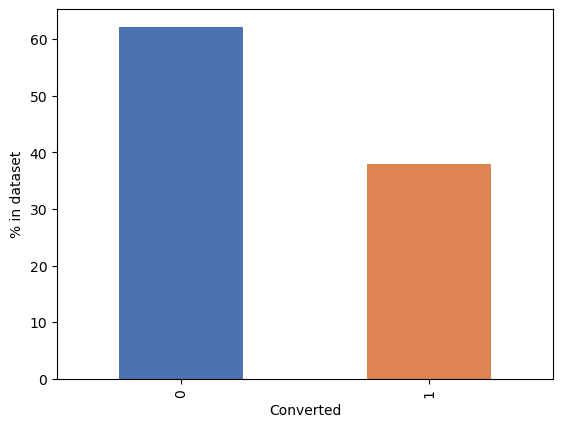

In [39]:
# Plot the percentage distribution for the target variable 'Converted'
percent_plot('Converted')
     

In [40]:
round(sum(lead["Converted"])/len(lead["Converted"].index),2)*100

38.0

* 38% of the 'Converted' data is 1, indicating that 38% of the leads are converted.

#### Visualizing numerical variables and treating outliers

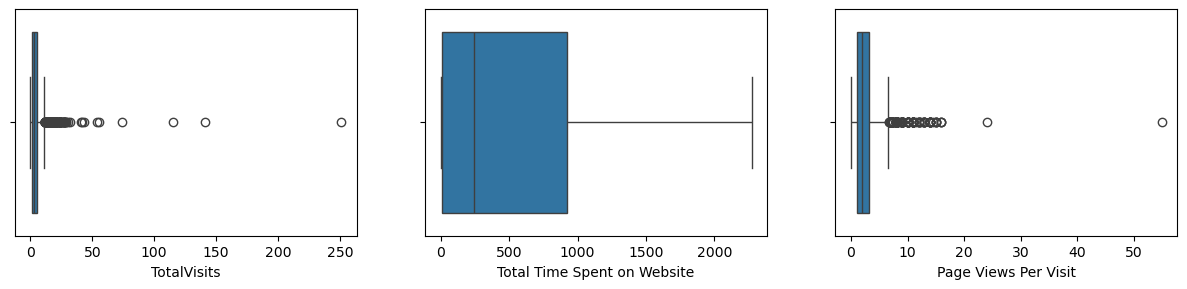

In [41]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15,10))
for var in num_var:
    plt.subplot(3,3,num_var.index(var)+1)
    sns.boxplot(data=lead, x=var)
plt.show()

In [42]:
lead[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


#### The boxplots shows that there are outliers in the variables.
* For 'TotalVisits', the 95th percentile is 10, while the maximum value is 251. We should cap the outliers at the 95th percentile value (10).
* There are no significant outliers in 'Total Time Spent on Website'.
* For 'Page Views Per Visit', similar to 'TotalVisits', we should cap the outliers at the 95th percentile value.

In [43]:
# Outliers Treatment 
percentile = lead["TotalVisits"].quantile([0.95]).values
lead["TotalVisits"][lead["TotalVisits"]>=percentile[0]]=percentile[0]

percentile = lead["Page Views Per Visit"].quantile([0.95]).values
lead["Page Views Per Visit"][lead["Page Views Per Visit"]>=percentile[0]]=percentile[0]

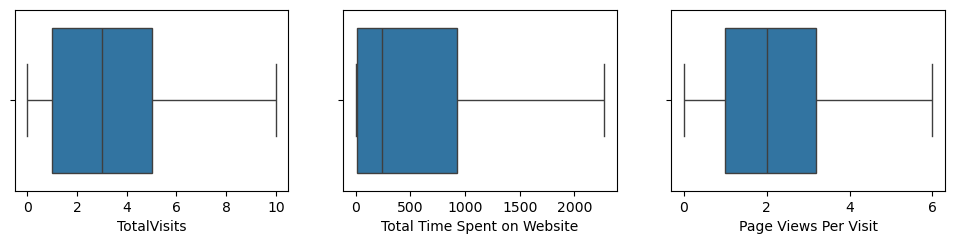

In [44]:
# Plot Boxplots to verify 
plt.figure(figsize=(12,8))
for var in num_var:
    plt.subplot(3,3,num_var.index(var)+1)
    sns.boxplot(data=lead,x=var)
plt.show()

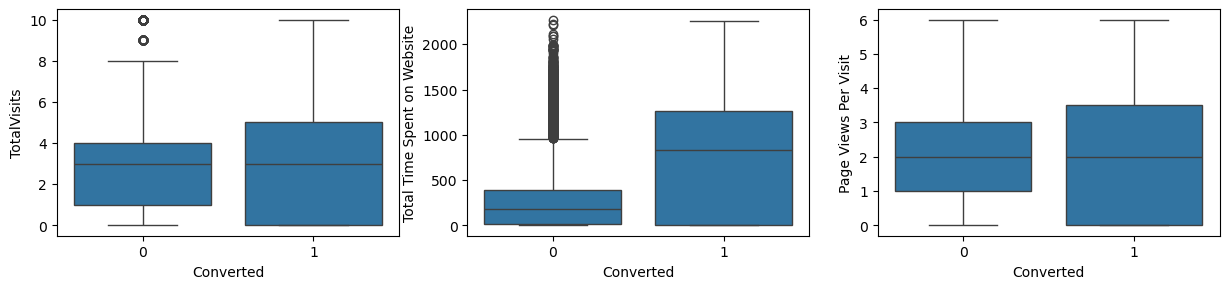

In [45]:
# plot boxplots against the target variable
plt.figure(figsize=(15,10))
for var in num_var:
    plt.subplot(3,3,num_var.index(var)+1)
    sns.boxplot(y=var,x='Converted',data=lead)
plt.show()

#### Observations:
* TotalVisits: Same median for both converted and non-converted leads; no meaningful conclusion.
* Time Spent on Website: More time spent on the website is linked to higher conversion chances.
* Page Views Per Visit : Identical median values for both lead categories; inconclusive.

#### Visualizing Categorical Data

In [46]:
# Categorical variables
cat_col = list(lead.columns[lead.dtypes == 'object'])
for i, col in enumerate(cat_col):
    print(f"{i}.{col}")

0.Lead Origin
1.Lead Source
2.Do Not Email
3.Do Not Call
4.Last Activity
5.Country
6.Specialization
7.What is your current occupation
8.What matters most to you in choosing a course
9.Search
10.Magazine
11.Newspaper Article
12.X Education Forums
13.Newspaper
14.Digital Advertisement
15.Through Recommendations
16.Receive More Updates About Our Courses
17.Tags
18.Lead Quality
19.Update me on Supply Chain Content
20.Get updates on DM Content
21.City
22.I agree to pay the amount through cheque
23.A free copy of Mastering The Interview
24.Last Notable Activity


In [47]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(15, 8))
    sns.countplot(x = var, hue = "Converted", data = lead)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = lead)
        plt.xticks(rotation = 90)
    plt.show()

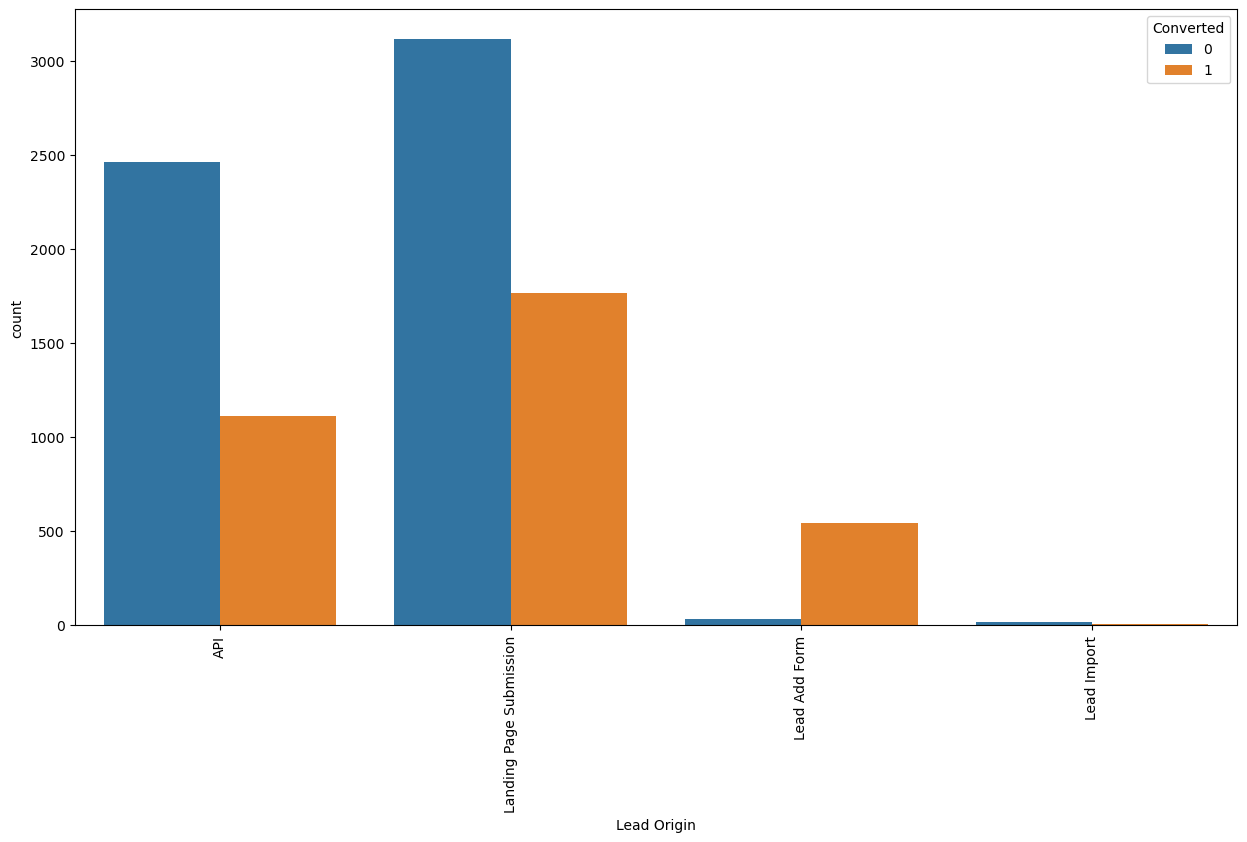

In [48]:
plot_cat_var(cat_col[0])

#### Observations for Lead Origin:

* 'API' and 'Landing Page Submission' generate the most leads but have lower conversion rates.
* 'Lead Add Form' generates fewer leads but has a higher conversion rate.
* 'Lead Import' does not appear to be very significant.

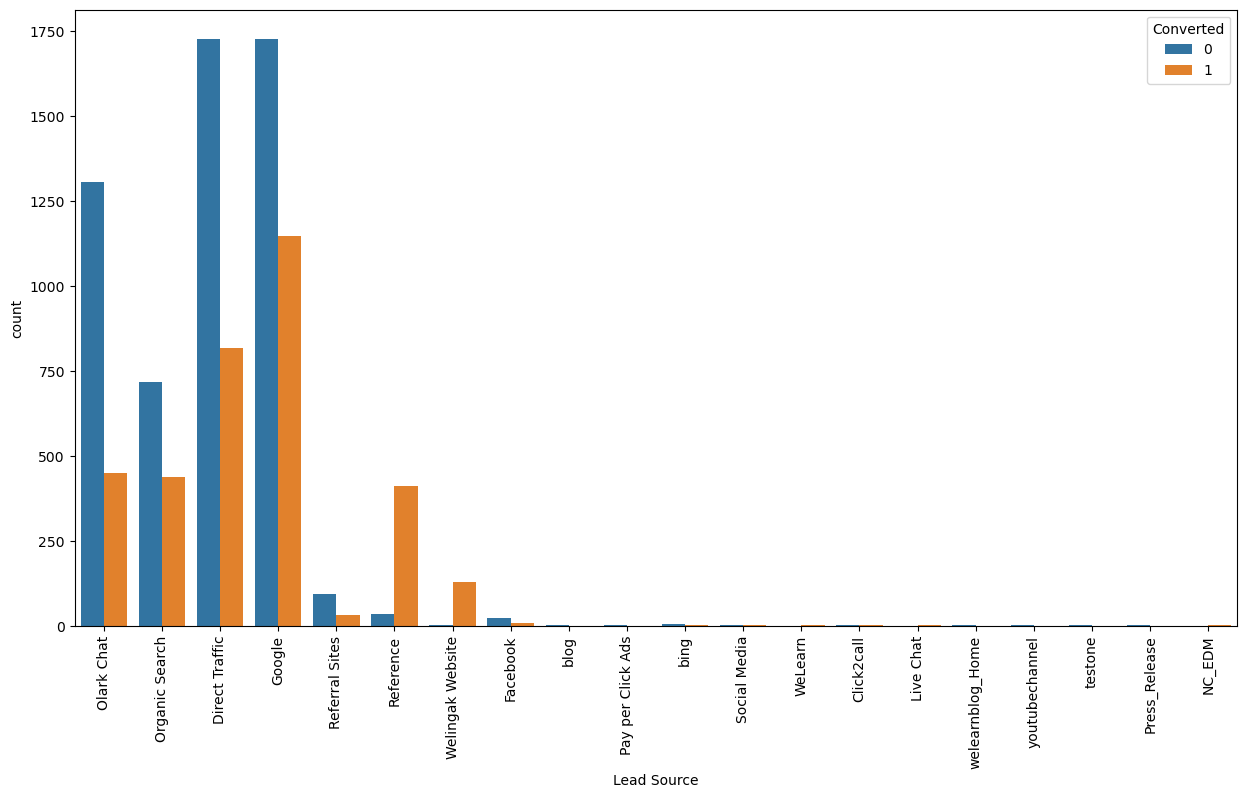

In [49]:
plot_cat_var(cat_col[1])

#### Observations for Lead Source:
* number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Miscellaneous'.
* 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [50]:
categories = lead['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [51]:
# To reduce categories
lead['Lead Source'] = lead['Lead Source'].replace(categories[8:], 'Miscellaneous')

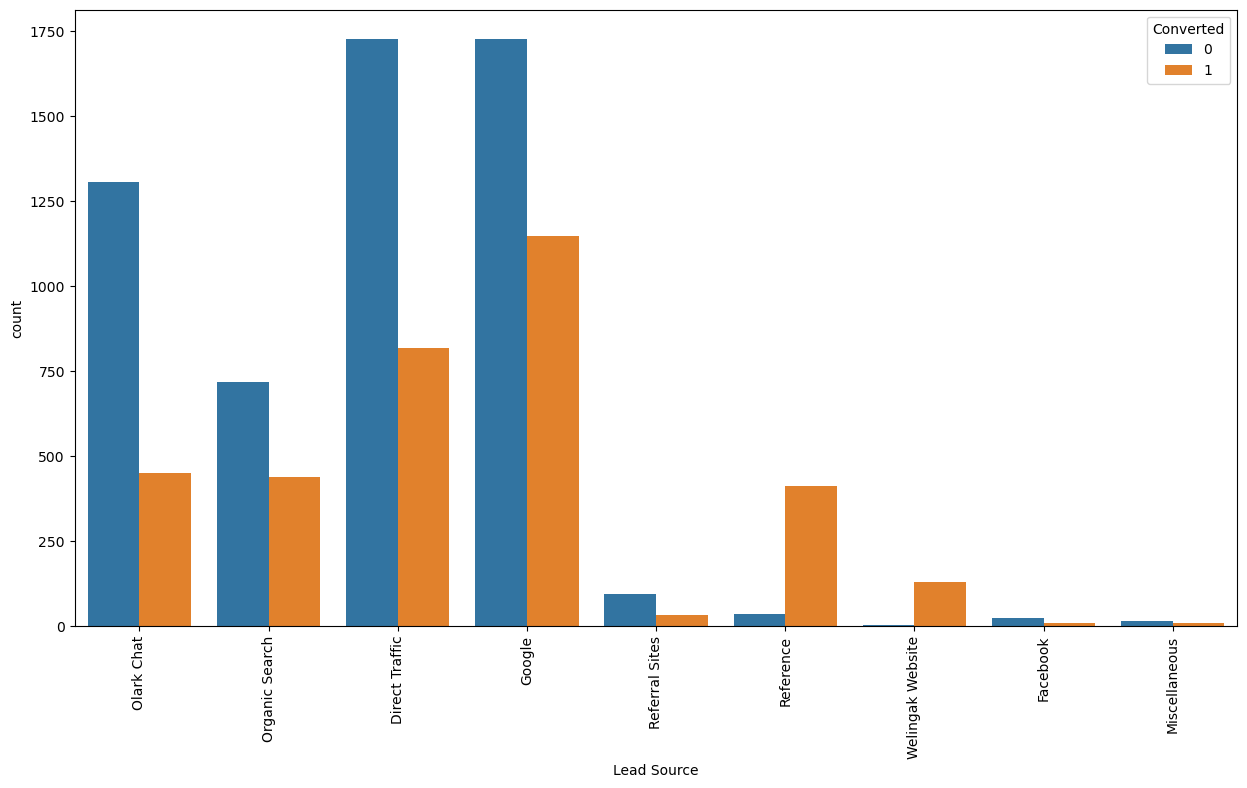

In [52]:
plot_cat_var(cat_col[1])

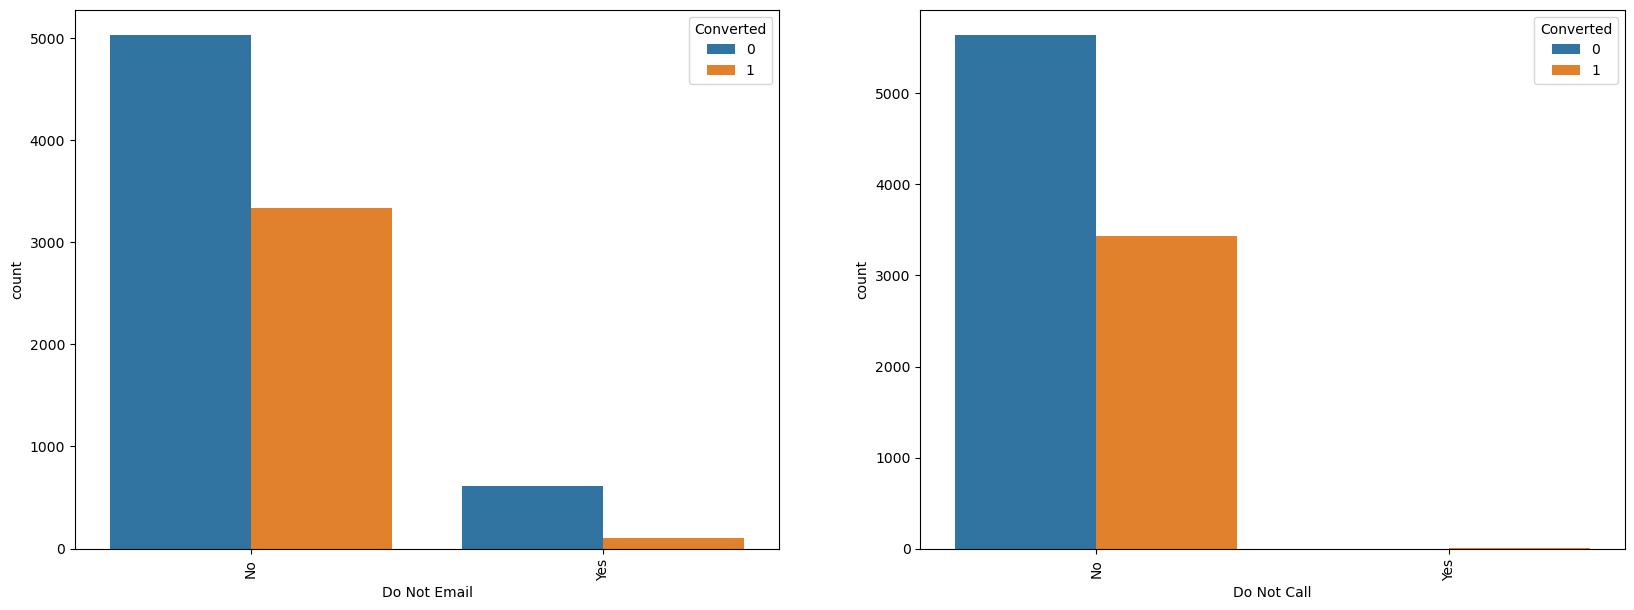

In [53]:
plot_cat_vars([cat_col[2],cat_col[3]])

#### Observations for Do Not Email and Do Not Call:
* most of the responses are 'No' for both the variables which generated most of the leads.

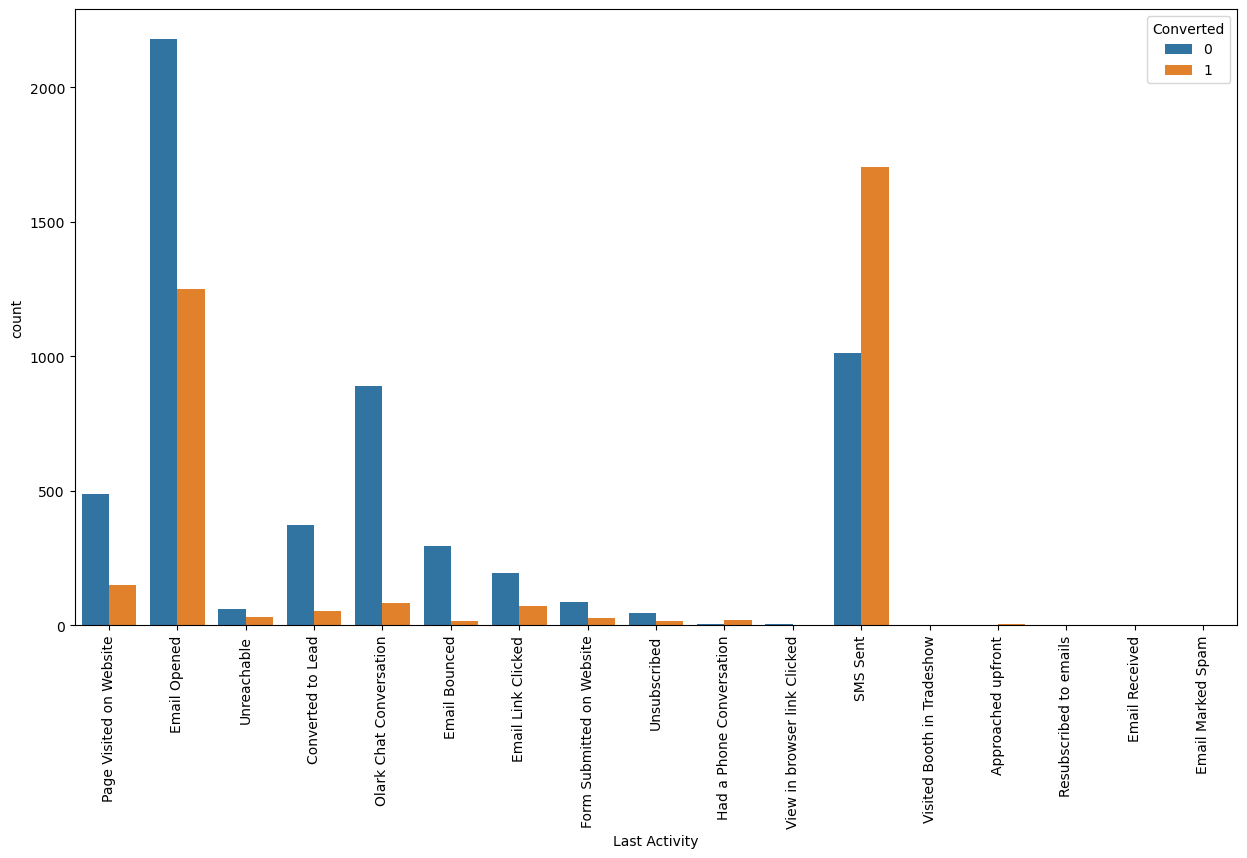

In [54]:
plot_cat_var(cat_col[4])

#### Observations for Last Activity:
* The highest number of leads are generated when the last activity is 'Email Opened.'
* The highest conversion rate is observed for the activity 'SMS Sent,' with a significantly high conversion rate.
* Categories following 'SMS Sent' have minimal impact and can be aggregated into a single category.

In [55]:
categories = lead['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [56]:
# To reduce categories
lead['Last Activity'] = lead['Last Activity'].replace(categories[-5:], 'Miscellaneous')

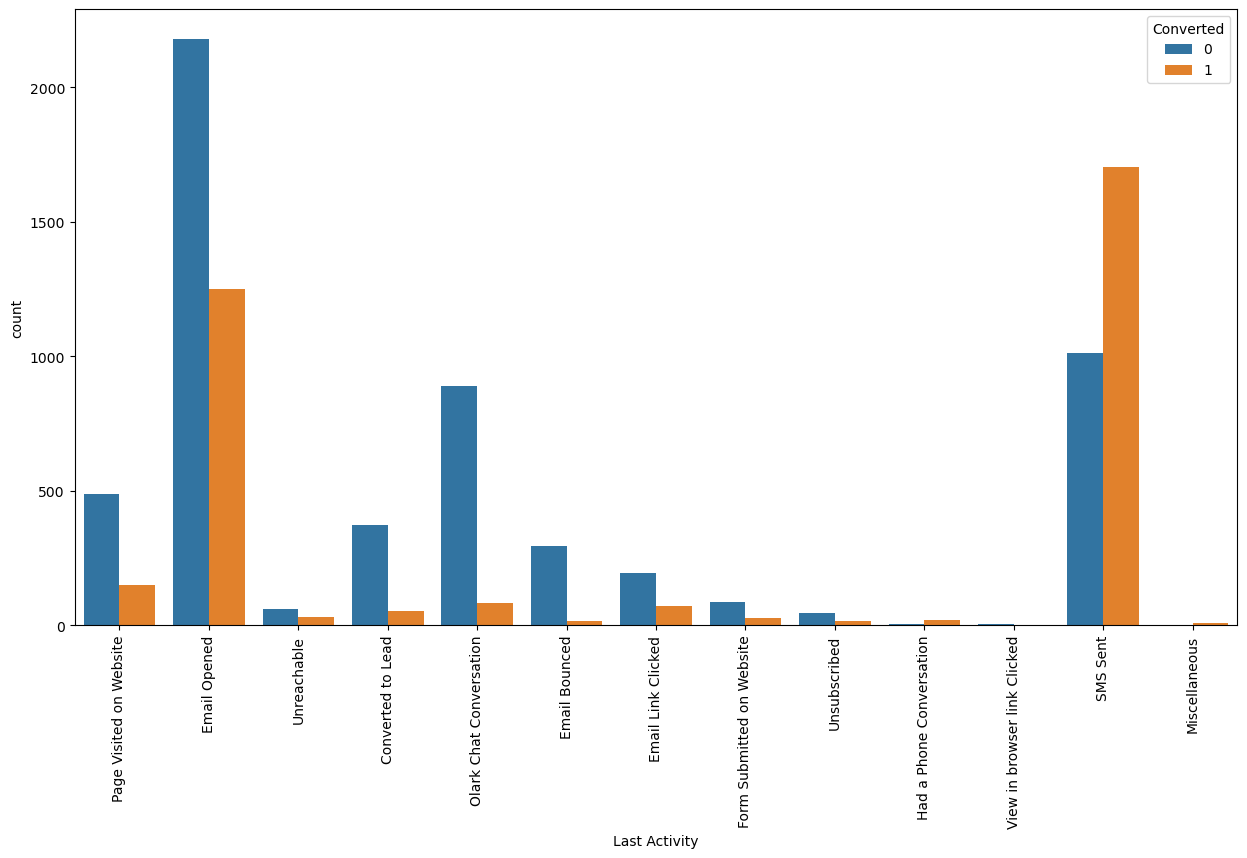

In [57]:
plot_cat_var(cat_col[4])

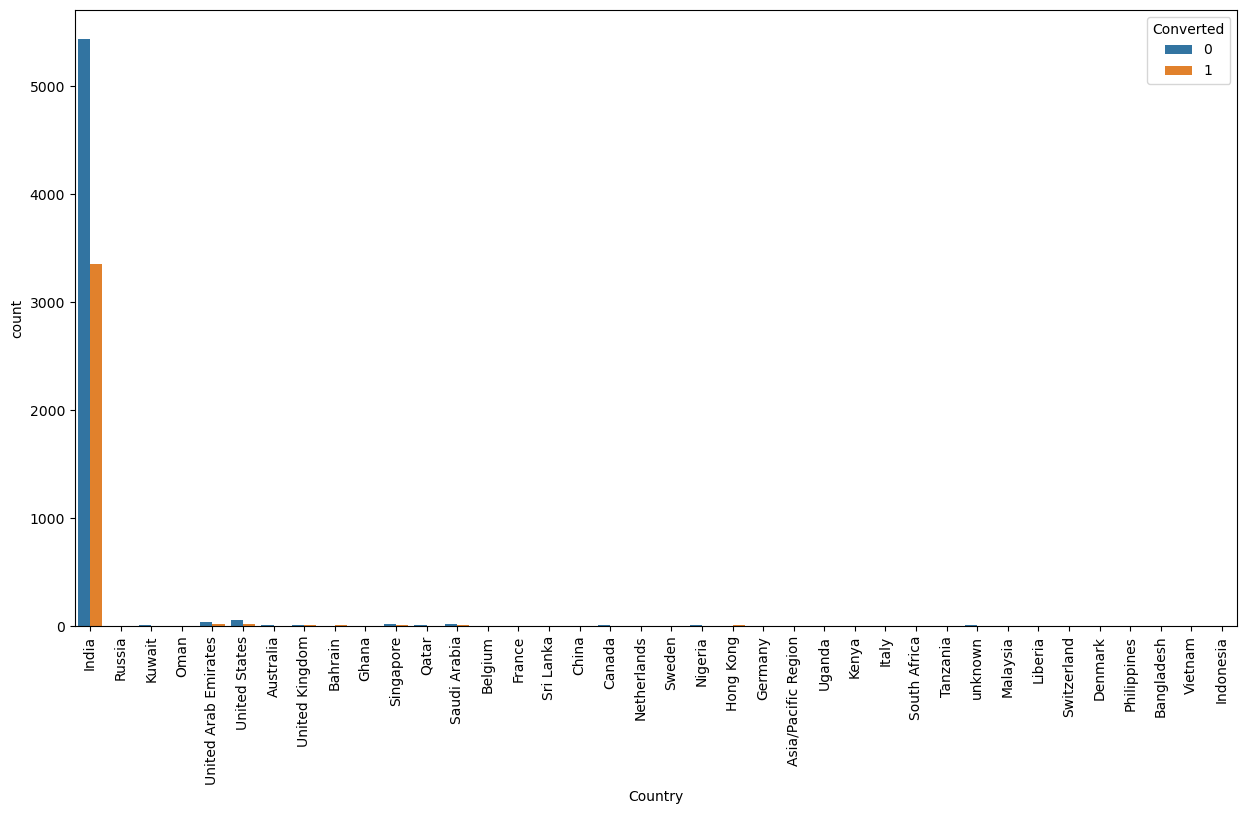

In [58]:
plot_cat_var(cat_col[5])

#### Observations for Country:
* Conversion rate is significat for India.

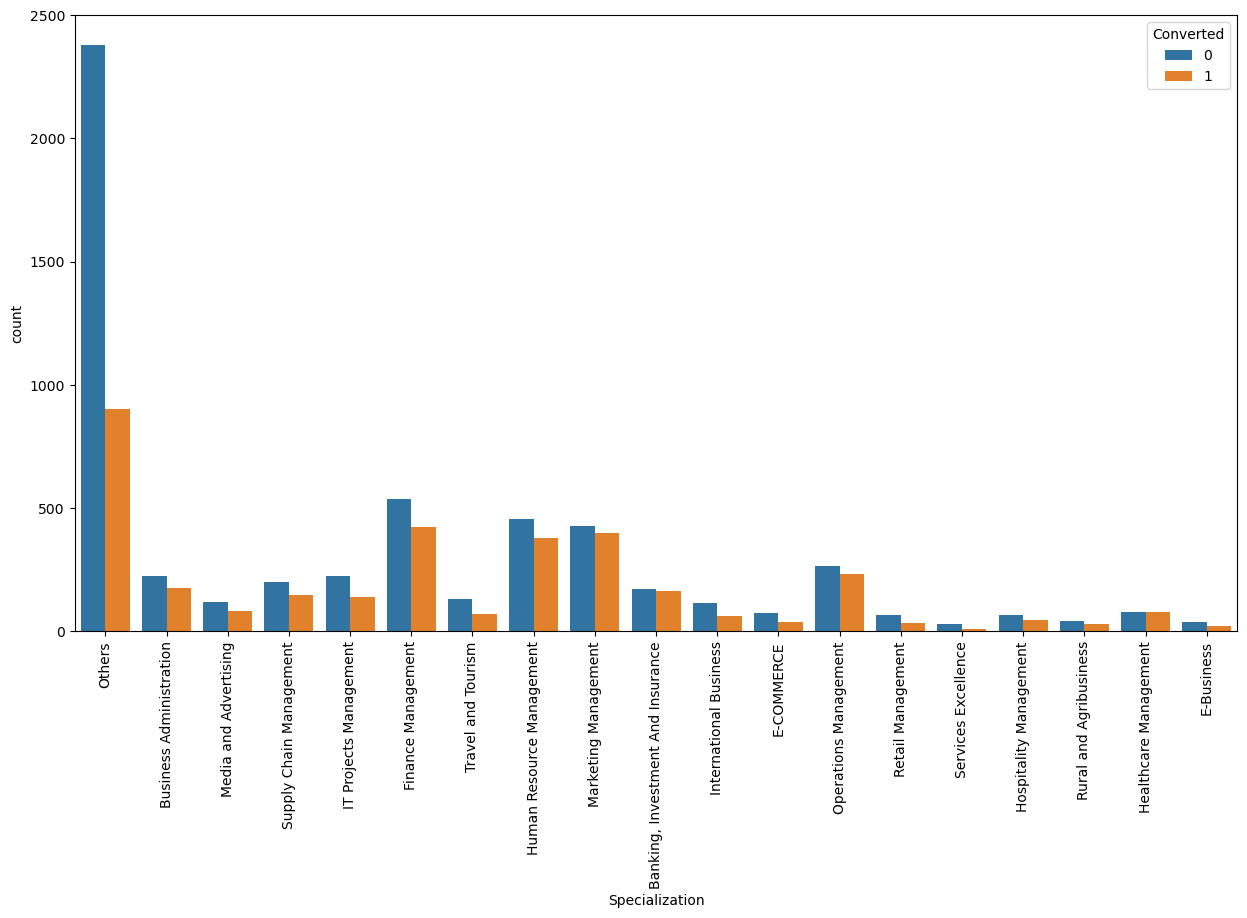

In [59]:
plot_cat_var(cat_col[6])

#### Observations for Specialization:
* Conversion rates are almost the same across different specializations.

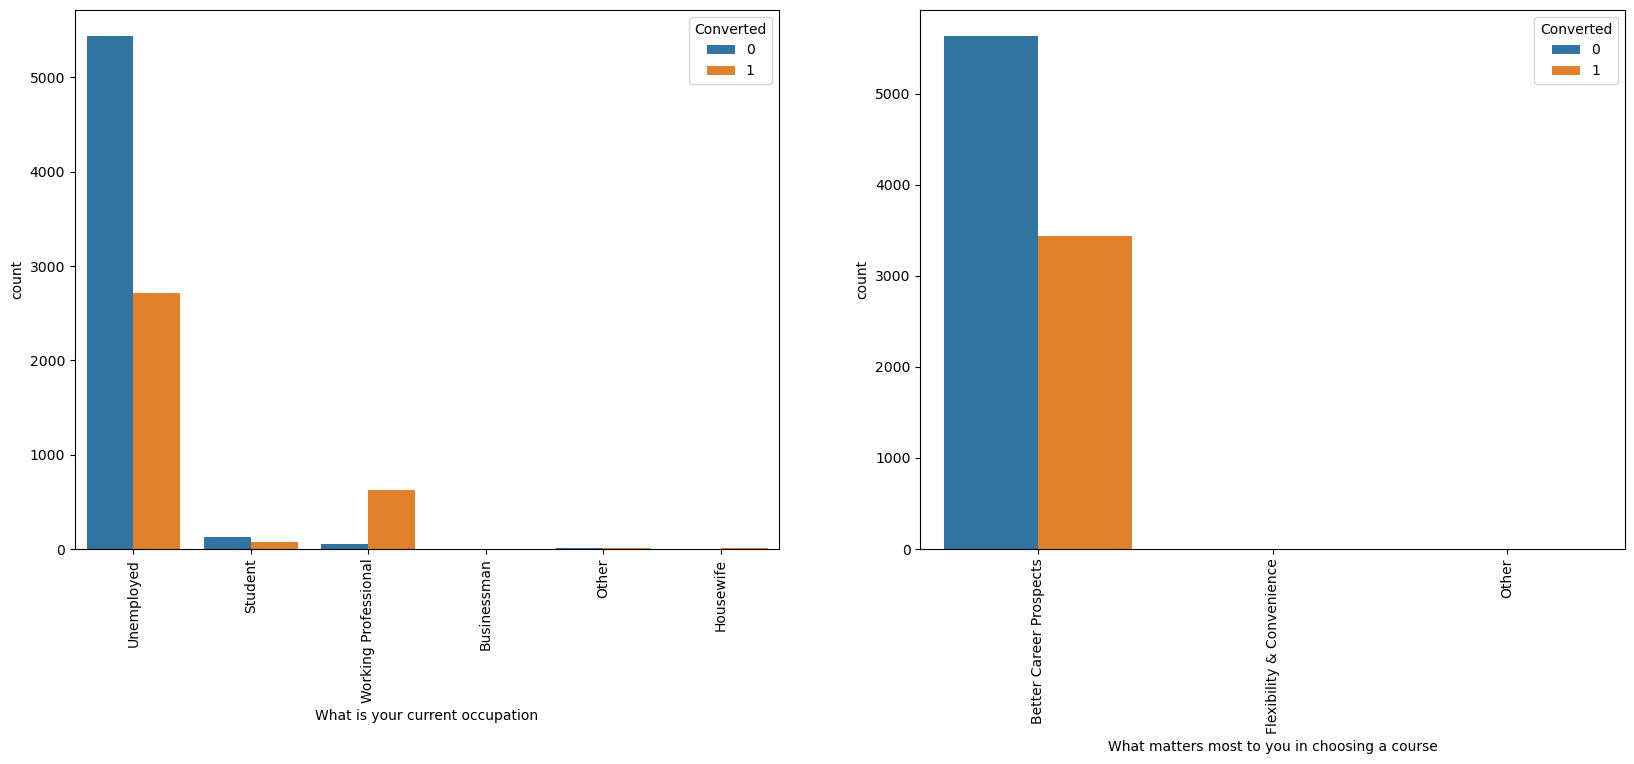

In [60]:
plot_cat_vars([cat_col[7],cat_col[8]])

#### Observations for 'what is your current occupation' and 'what matters most to you in choosing a course':

* The highest conversion rate is observed among "Working Professionals".
* Although 'Unemployed' individuals generate a large number of leads, the conversion rate for this group is relatively low.
* The variable 'What matters most to you in choosing a course' contains only one category with a significant count i.e., "Better Career Prospects".

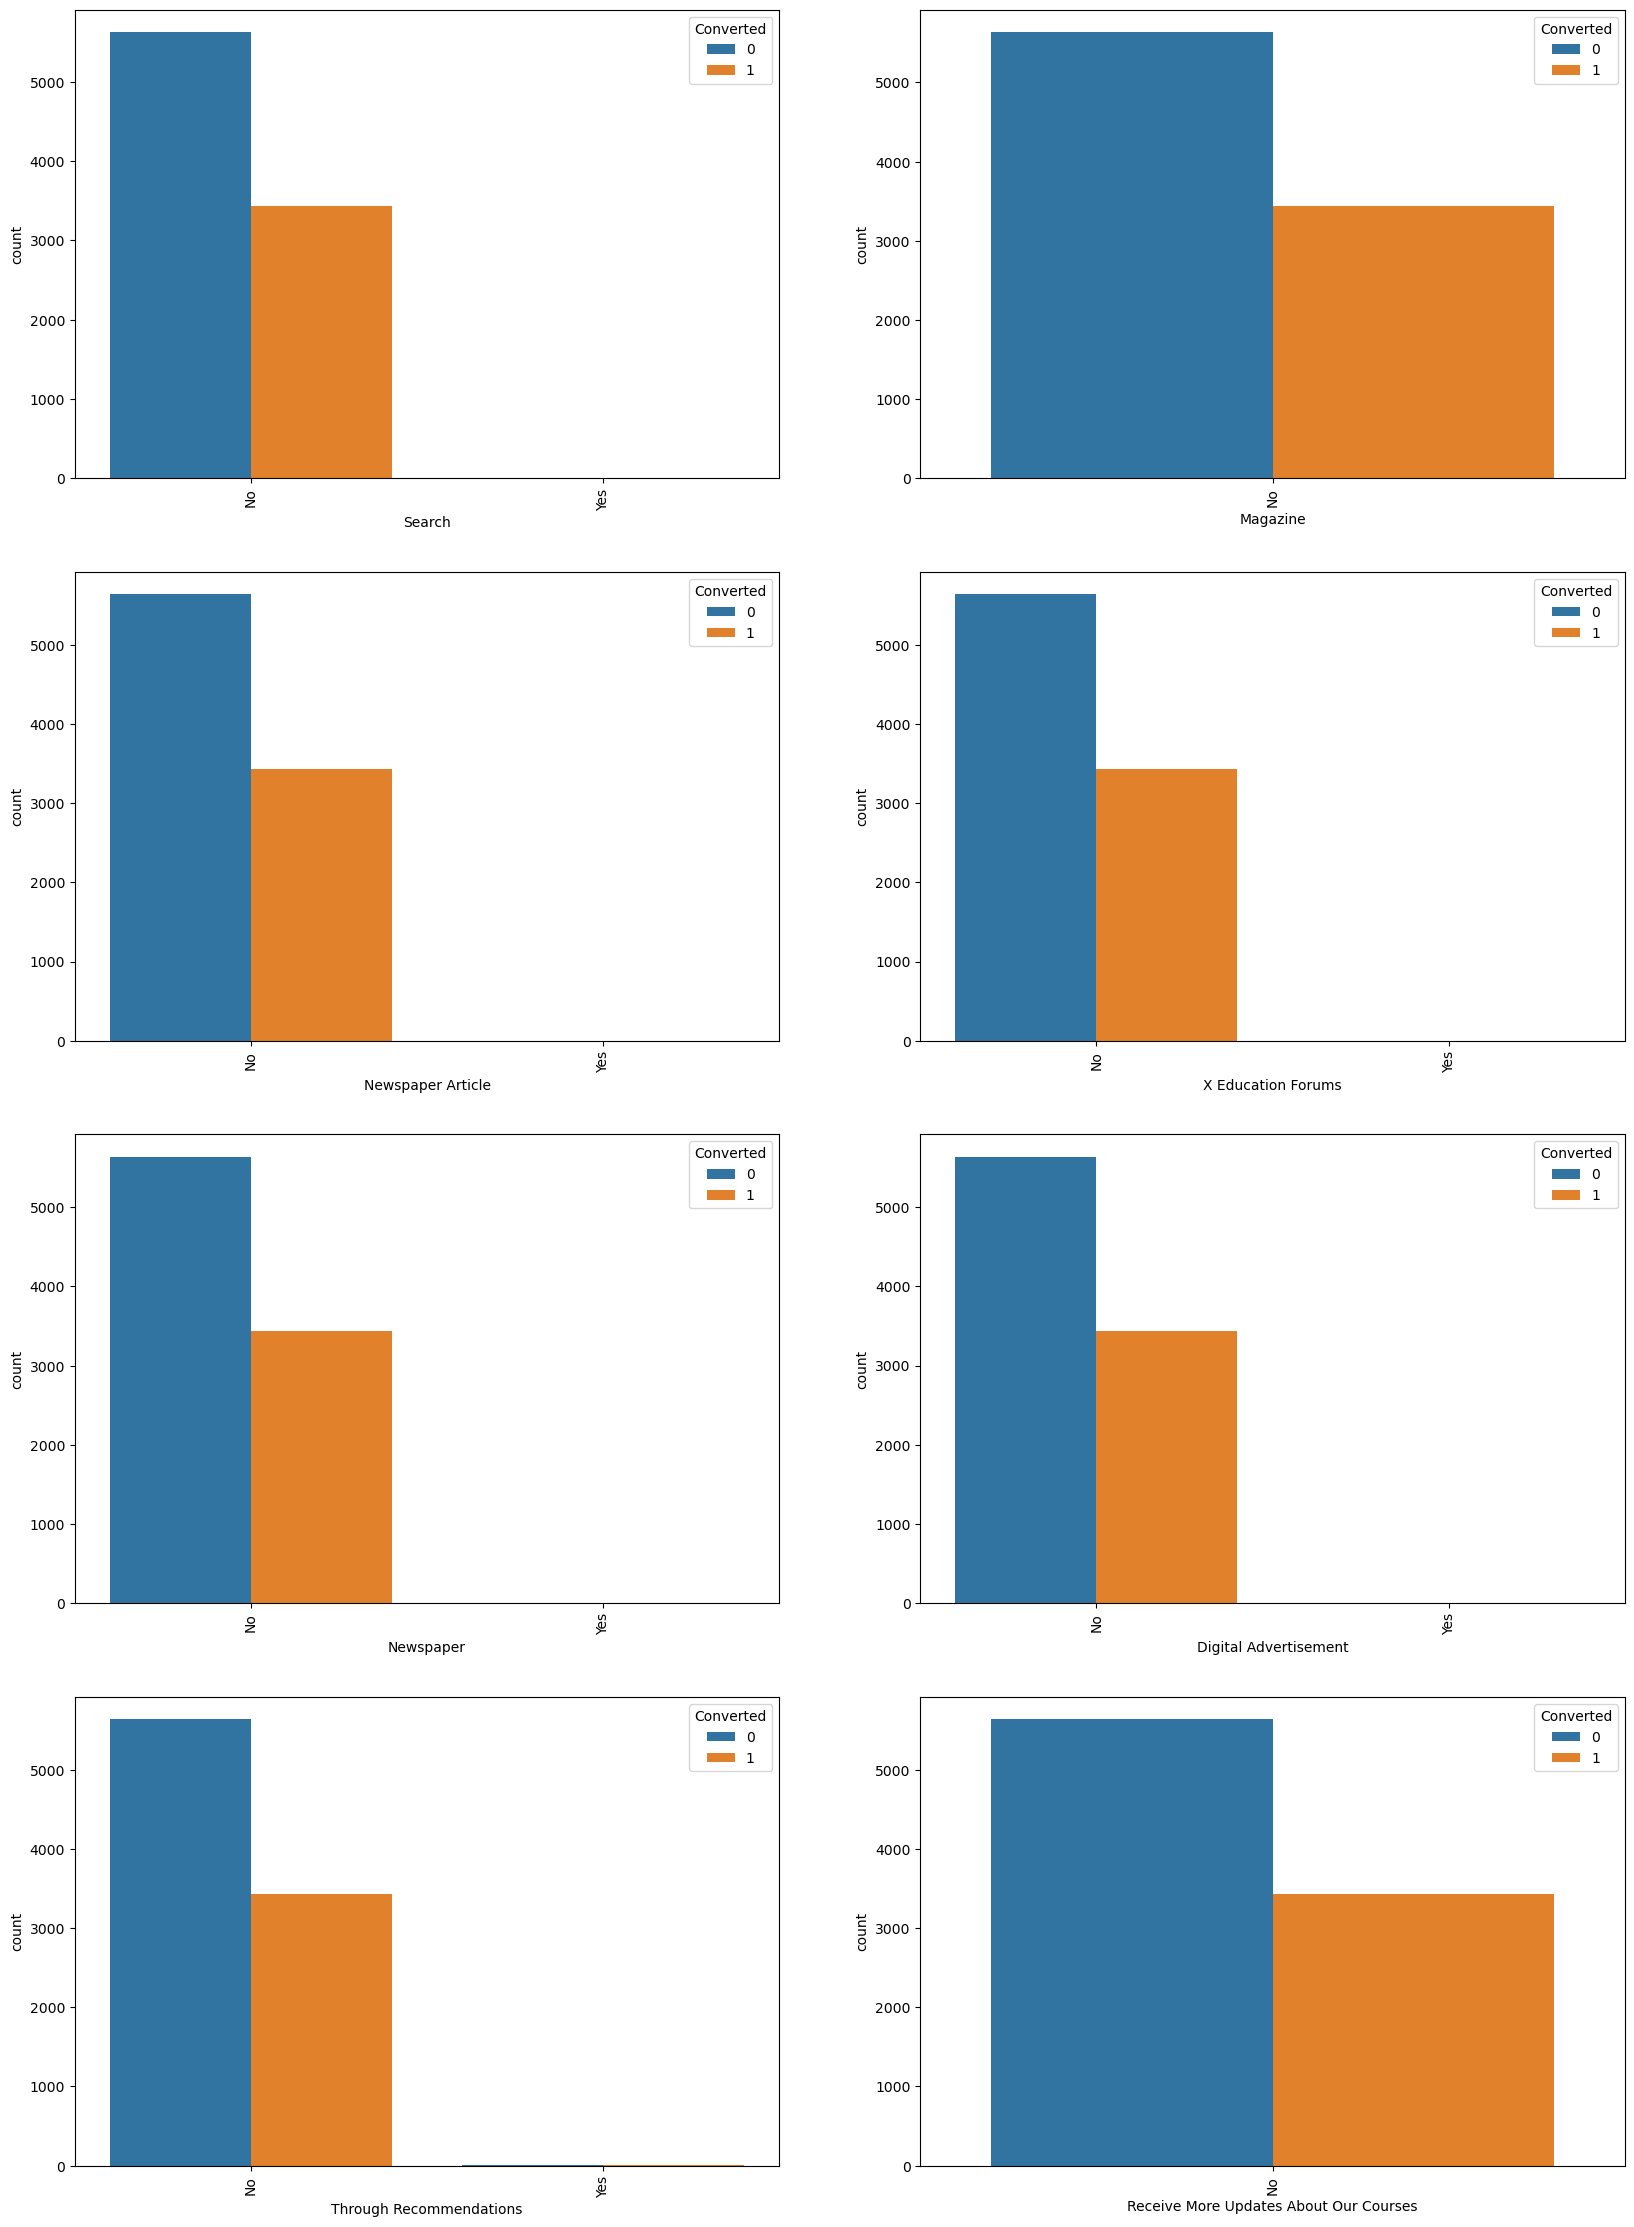

In [61]:
plot_cat_vars(cat_col[9:17])

#### Observations:
* From the above plots, nothing significant can be inferred as most values are "No."

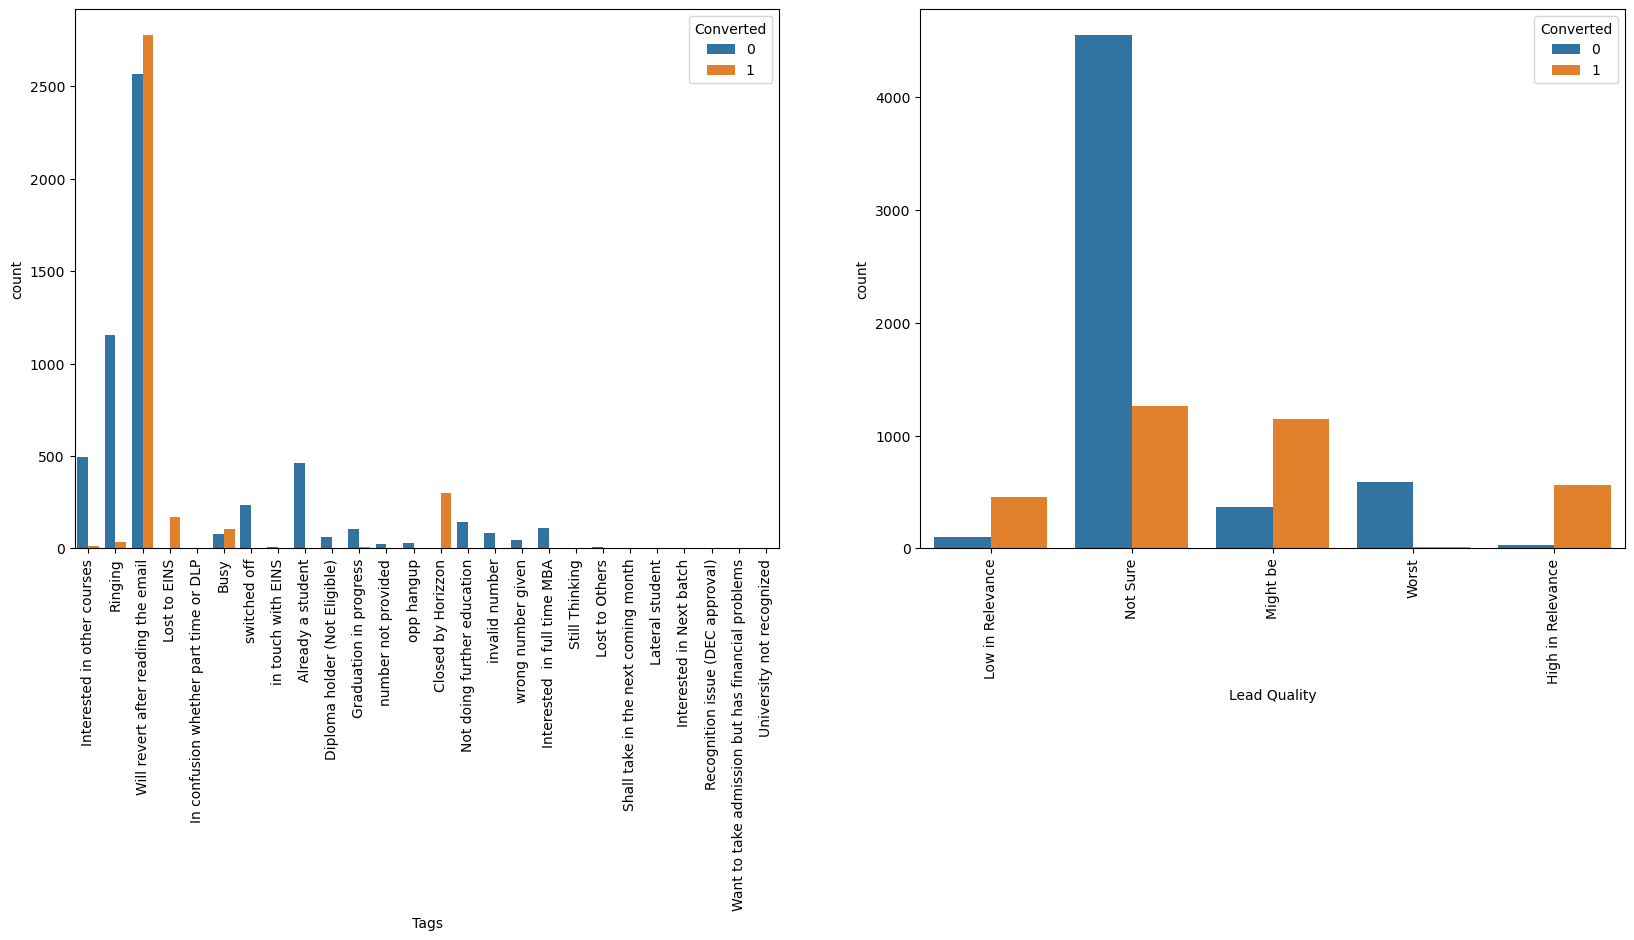

In [62]:
plot_cat_vars([cat_col[17],cat_col[18]])

#### Observations for Tags and Lead Quality:
* Categories in Tags after 'Interested in full time MBA' have very few leads and can be combined into one category.
* The highest number of leads and the highest conversion rate are associated with the tag 'Will revert after reading the email.'
* In Lead Quality, 'Might be' has the highest conversion rate, while 'Worst' has the lowest.

In [63]:
categories = lead['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [64]:
# To reduce categories
lead['Tags'] = lead['Tags'].replace(categories[-8:], 'Miscellaneous')

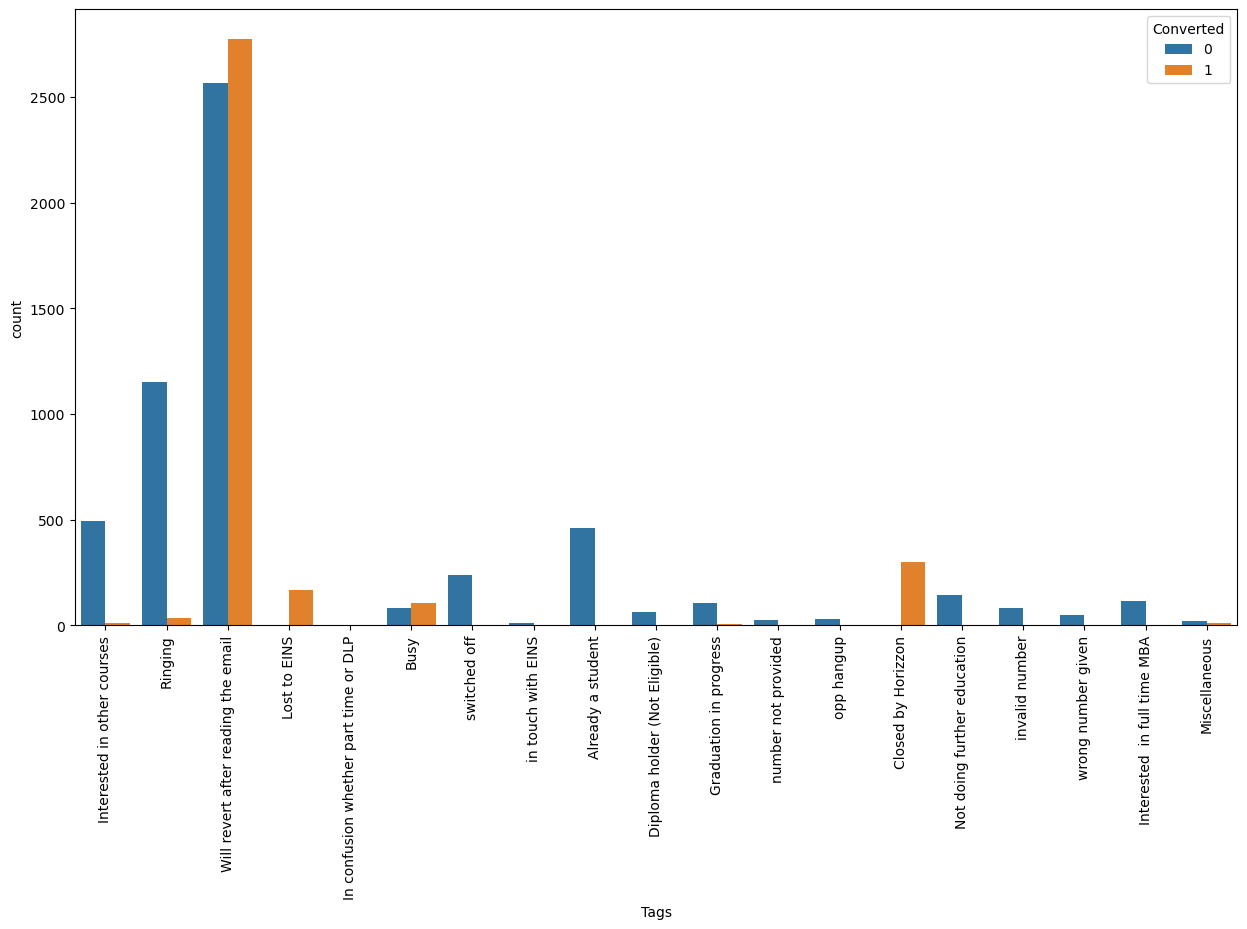

In [65]:
# To plot new categories
plot_cat_var(cat_col[17])

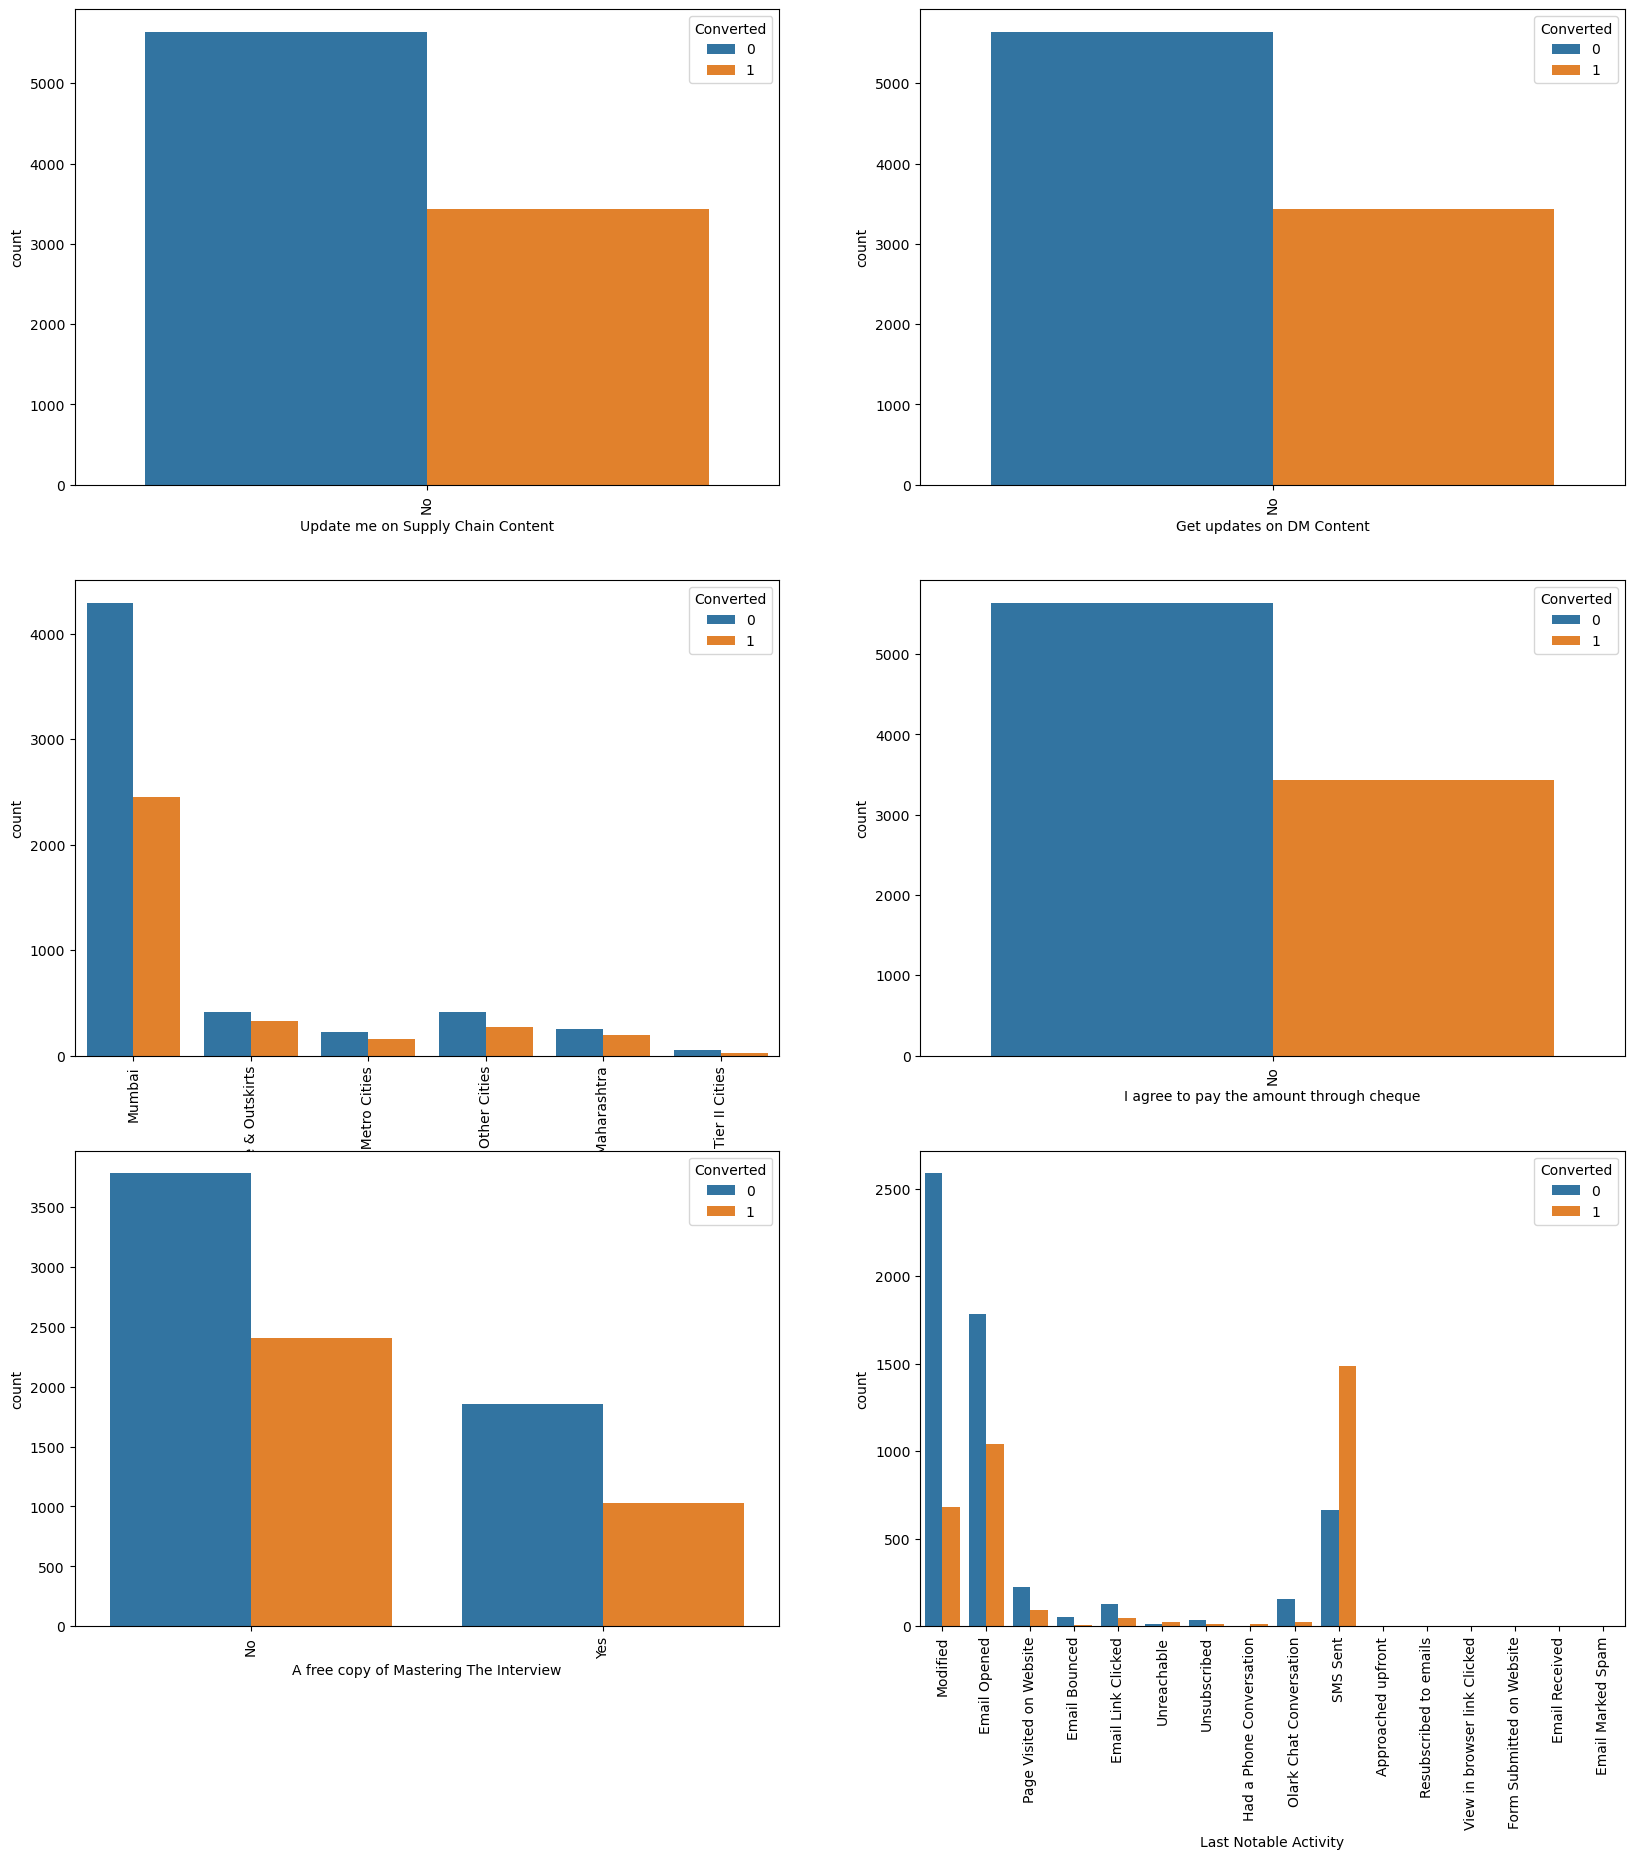

In [66]:
plot_cat_vars(cat_col[19:25])

#### From the above plots, we can observe that:

* Most of these variables are insignificant for analysis, as they mainly have the category 'NO' as the dominant value.
* In the 'City' variable, most of the leads are generated from 'Mumbai.'
* For the variable 'A free copy of Mastering The Interview,' both categories have similar conversion rates.
* In 'Last Notable Activity,' categories after 'SMS Sent' can be combined, similar to 'Last Activity.' The 'Modified' category generates the most leads, while the highest conversion rate is observed for 'SMS Sent.'

In [67]:
categories = lead['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [68]:
# To reduce the Categories 
lead['Last Notable Activity']=lead['Last Notable Activity'].replace(categories[-6:],'Miscellaneous')

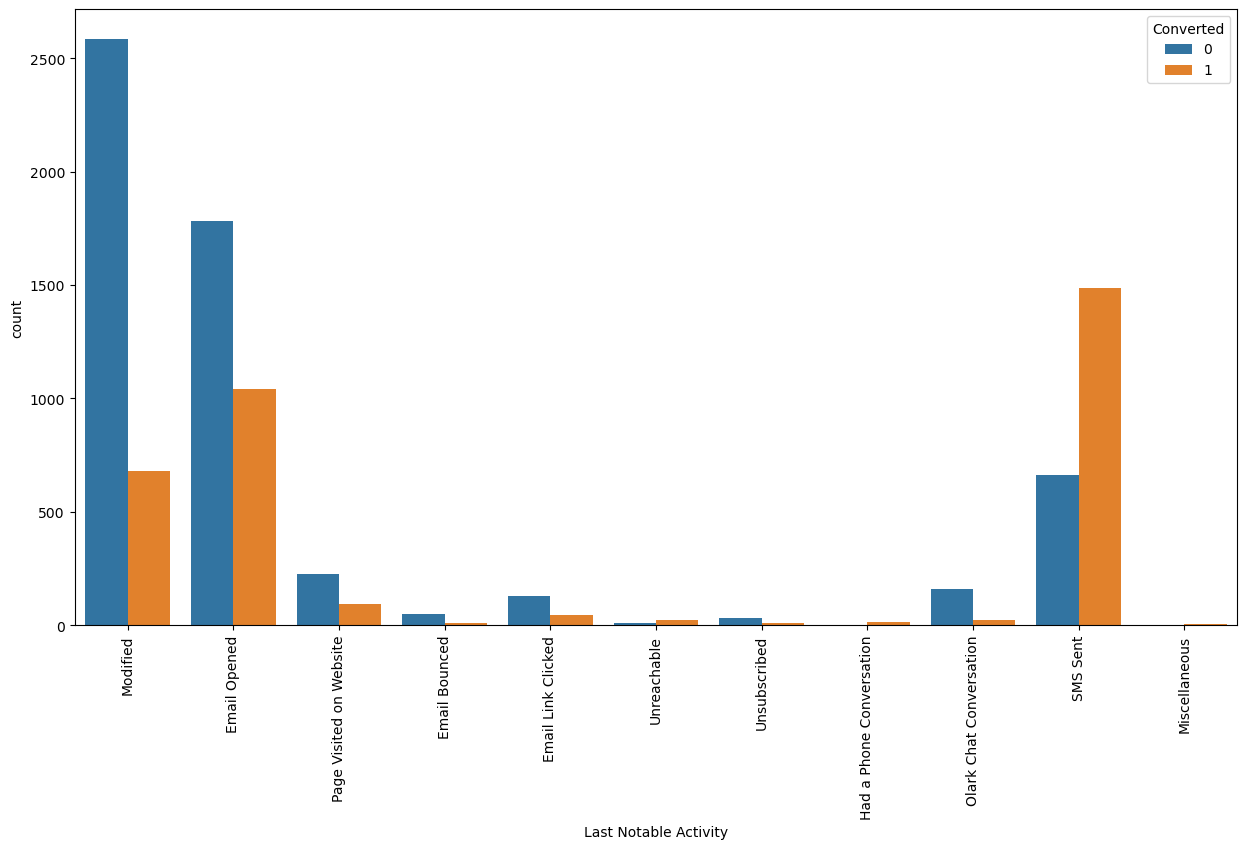

In [69]:
plot_cat_var(cat_col[24])

* Based on the data visualization, we can remove the variables that are not significant for analysis and do not contribute any valuable information to the model.

In [70]:
lead = lead.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],axis=1)


In [71]:
# Final DataFrame
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [72]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                     

In [73]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


## Step 4: Data Preparation

In [74]:
# To convert binary variable (Yes/No) to 0/1
lead['Do Not Email'] = lead['Do Not Email'].map({'Yes':0,'No':1})

In [75]:
# Categorical variables
cat_col = list(lead.columns[lead.dtypes == 'object'])
cat_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [76]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(lead[cat_col], drop_first=True)

# To add result to the original dataframe
lead= pd.concat([lead, dummy], axis=1)

# To drop the original variables
lead= lead.drop(cat_col,axis=1)
     

In [77]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Miscellaneous,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,1,0,0.0,0,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1,0,5.0,674,2.5,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,1,2.0,1532,2.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,0,1.0,305,1.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1,1,2.0,1428,1.0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [78]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 88 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   bool   
 6   Lead Origin_Lead Add Form                             9074 non-null   bool   
 7   Lead Origin_Lead Import                               9074 non-null   bool   
 8   Lead Source_Facebook                                  9074 non-

In [79]:
# List of columns to convert to 0 and 1
columns_to_convert = lead.columns[5:88]  

# Apply the conversion
lead[columns_to_convert] = lead[columns_to_convert].applymap(lambda x: 1 if x else 0)

In [80]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Miscellaneous,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,1,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#### Train-Test Split

In [81]:
# Importing required package
from sklearn.model_selection import train_test_split

In [82]:
# To put feature variable to X
X = lead.drop(['Converted'],axis=1)
y = lead['Converted']

In [83]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
     

#### Feature Scaling

In [84]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
# Numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [87]:
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Miscellaneous,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,1,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,1,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4750,1,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,1,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Step 5: Model Building
#### Feature Selection Using RFE

In [88]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [89]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 71),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Miscellaneous', False, 47),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Reference', False, 64),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 50),
 ('Last Activity_Email Link Clicked', False, 40),
 ('Last Activity_Email Opened', False, 70),
 ('Last Activity_Form Submitted on Website', False, 73),
 ('Last Activity_Had a Phone Conversation', False, 16),
 ('Last Activity_Miscellaneous', False, 34),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Page Visited on Website', False

In [91]:
# Features selected
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [92]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Miscellaneous', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Miscellaneous',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Sp

In [93]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',axis=1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

#### Model-1

In [95]:
X1, logm1 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1579.7
Date:                Mon, 16 Dec 2024   Deviance:                       3159.4
Time:                        22:47:56   Pearson chi2:                 3.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5664
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

* 'Tags_invalid number' has p-value>0.05. Hence, it is insignificant and can be dropped.

#### Model-2

In [96]:
col2 = col1.drop('Tags_invalid number',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.8
Date:                Mon, 16 Dec 2024   Deviance:                       3171.6
Time:                        22:47:56   Pearson chi2:                 3.08e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5655
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

'Tags_number not provided' has p-value>0.05. Hence,it is insignificant and can be dropped it.

#### Model-3

In [97]:
col3 = col2.drop('Tags_number not provided',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Mon, 16 Dec 2024   Deviance:                       3177.6
Time:                        22:47:56   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5651
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [98]:
check_VIF(X3)

,Features,VIF
0,Do Not Email,6.46
8,Tags_Will revert after reading the email,4.45
10,Lead Quality_Not Sure,3.31
7,Tags_Ringing,1.84
1,Lead Origin_Lead Add Form,1.63
12,Last Notable Activity_SMS Sent,1.54
2,Lead Source_Welingak Website,1.37
5,Tags_Closed by Horizzon,1.31
3,What is your current occupation_Working Profes...,1.29
11,Lead Quality_Worst,1.29


* Since 'Do Not Email' has a Variance Inflation Factor (VIF) greater than 5, it is considered insignificant and can be Dropped.

#### Model-4

In [99]:
col4= col3.drop('Do Not Email',1)

# To rebuild the model
X4, logm4 = build_model(X_train[col4],y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1611.4
Date:                Mon, 16 Dec 2024   Deviance:                       3222.8
Time:                        22:47:56   Pearson chi2:                 2.61e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5620
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [100]:
check_VIF(X4)

,Features,VIF
7,Tags_Will revert after reading the email,2.80
9,Lead Quality_Not Sure,2.72
0,Lead Origin_Lead Add Form,1.62
6,Tags_Ringing,1.53
11,Last Notable Activity_SMS Sent,1.52
1,Lead Source_Welingak Website,1.36
2,What is your current occupation_Working Profes...,1.26
4,Tags_Closed by Horizzon,1.14
3,Tags_Busy,1.11
8,Tags_switched off,1.10


* All the features have p-values are close to zero and VIF values less than 5, indicating they are statistically significant and exhibit low multicollinearity.

In [101]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [102]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion
     

In [103]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

<Axes: >

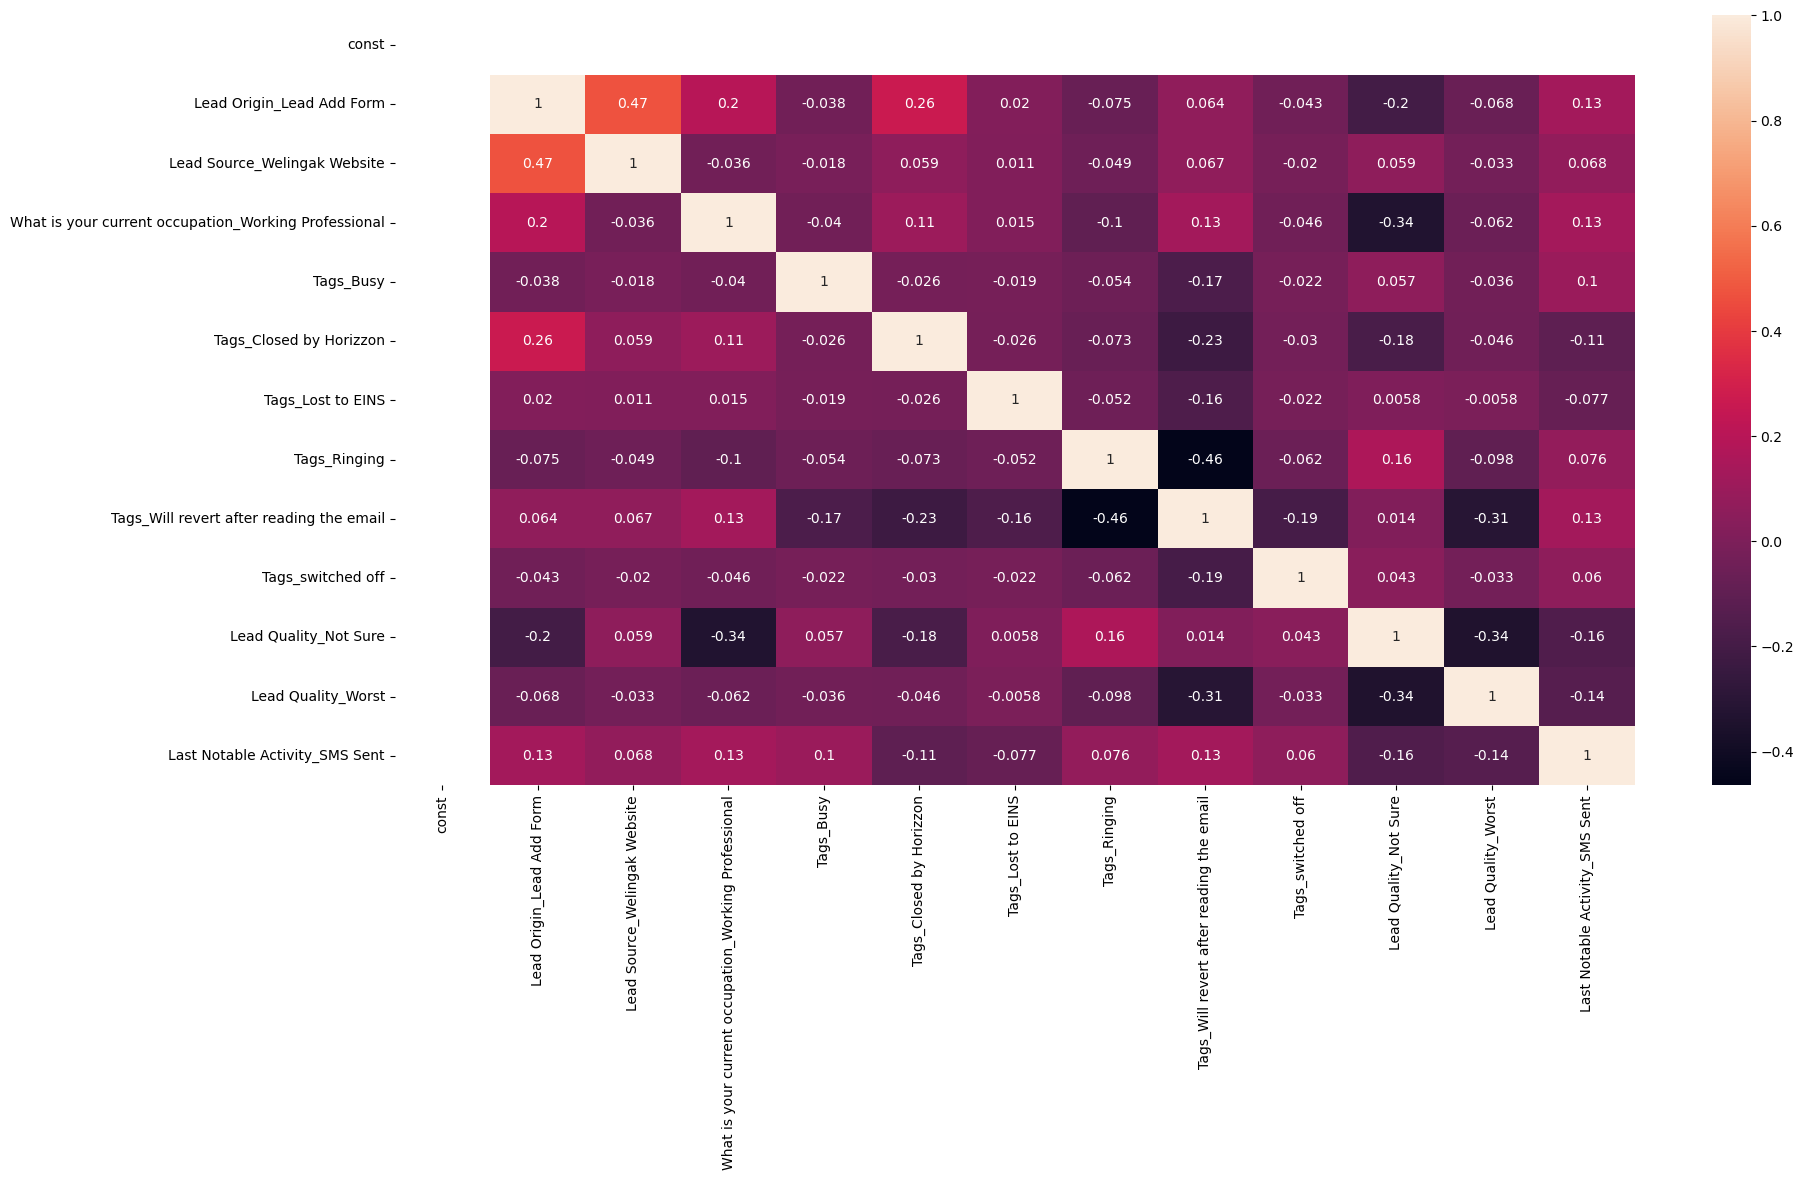

In [104]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

In [105]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.174329,3009,0
1,0,0.429146,1012,0
2,0,0.000718,9226,0
3,1,0.767691,4750,1
4,1,0.975679,7987,1


In [106]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3747  158]
 [ 353 2093]]
Training Accuracy:  0.9195402298850575


In [107]:
other_metrics(confusion)


Sensitivity:  0.8556827473426002
Specificity:  0.9595390524967989
False postive rate:  0.04046094750320103
Positive predictive value:  0.929808973789427
Negative predictive value:  0.9139024390243903


#### Final Model:
* All p-values are very close to zero, indicating statistical significance for the features.
* VIFs for all features are low, suggesting minimal multicollinearity.
* The training accuracy of 91.95% at a probability threshold of 0.05 is also Strong.

## Step 6: Model Evaluation
#### Plotting the ROC Curve

In [108]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [109]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)


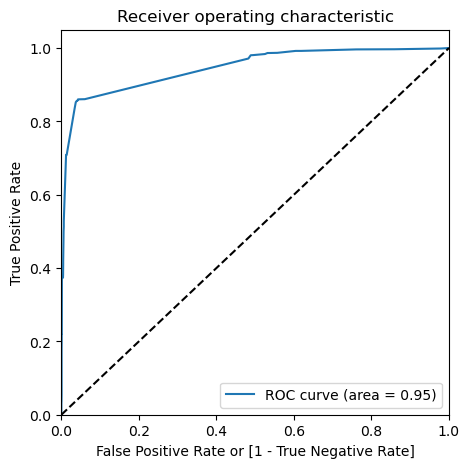

In [110]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [111]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))


Area under curve:  0.9461507093553665


#### Finding Optimal Cutoff Point

In [112]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.174329,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.429146,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.000718,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.767691,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.975679,7987,1,1,1,1,1,1,1,1,1,1,1


In [113]:

# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.671075  0.983647  0.475288
0.2   0.2  0.909148  0.860589  0.939565
0.3   0.3  0.919855  0.859771  0.957490
0.4   0.4  0.919383  0.858136  0.957746
0.5   0.5  0.919540  0.855683  0.959539
0.6   0.6  0.920170  0.855683  0.960563
0.7   0.7  0.920328  0.852412  0.962868
0.8   0.8  0.879704  0.709730  0.986172
0.9   0.9  0.814202  0.527392  0.993854


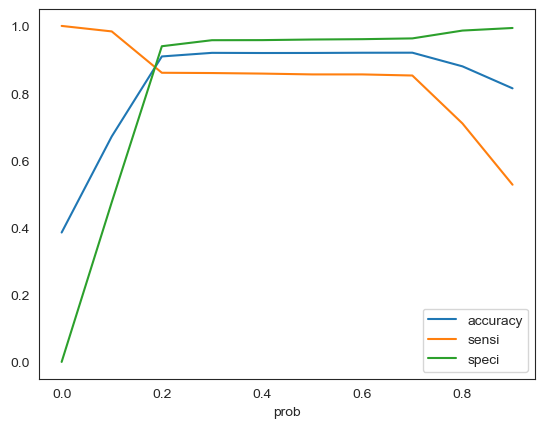

In [114]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* From the above curve, 0.2 is the optimum point to take as a cutoff probability.

In [115]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.174329,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.429146,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.000718,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.767691,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.975679,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [116]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3669  236]
 [ 341 2105]]
Training Accuracy:  0.9091481656432058


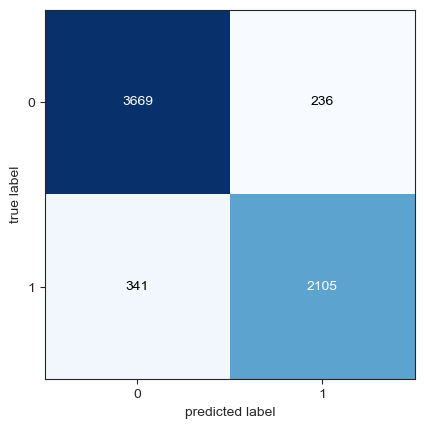

In [117]:
# To plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion2)
plt.show()

In [118]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.8605887162714636
Specificity:  0.9395646606914213
False postive rate:  0.060435339308578744
Positive predictive value:  0.8991883810337462
Negative predictive value:  0.9149625935162095


#### Classification Report

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3905
           1       0.90      0.86      0.88      2446

    accuracy                           0.91      6351
   macro avg       0.91      0.90      0.90      6351
weighted avg       0.91      0.91      0.91      6351



## Step 7: Precision and Recall

In [120]:
from sklearn.metrics import precision_score, recall_score


In [121]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.929808973789427

In [122]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.8556827473426002

In [123]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.929808973789427

* Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))

In [124]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8556827473426002

* Recall = True Positives (TP) / (True Positives (TP) + False Negatives (FN))

#### Precision and Recall Tradeoff

In [125]:
from sklearn.metrics import precision_recall_curve


In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


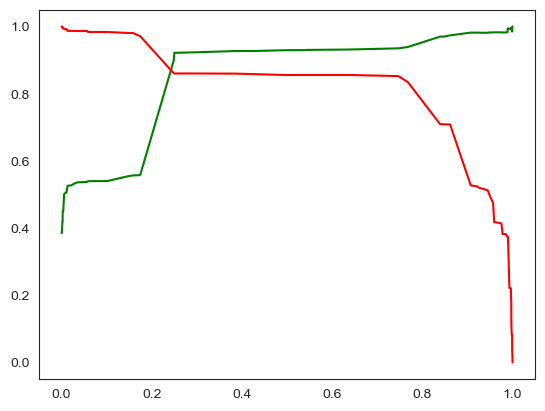

In [127]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()
     

* From the curve above, 0.25 is the optimum point to take as a cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.

In [128]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()
     

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.174329,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.429146,1012,0,1,1,1,1,1,0,0,0,0,0,1,1
2,0,0.000718,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.767691,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.975679,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [129]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)
     

Confusion Matrix:
[[3726  179]
 [ 342 2104]]
Training Accuracy:  0.9179656746968982


In [130]:
# Other metrics
other_metrics(confusion3)
     

Sensitivity:  0.8601798855273917
Specificity:  0.9541613316261204
False postive rate:  0.04583866837387964
Positive predictive value:  0.9215943933420937
Negative predictive value:  0.915929203539823


## Step 8: Prediction on test set

In [131]:
# Feature transform on Test set
X_test[num_var] = scaler.transform(X_test[num_var])

X_test.head()
     

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Miscellaneous,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,1,0.284772,-0.600595,0.955505,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,1,0.643547,1.887326,1.510766,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7936,1,-0.432779,-0.752879,-0.155018,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,1,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3830,1,1.719873,-0.587751,2.066027,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [132]:
# To get final features
X_test_sm = X_test[col4]

In [133]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

# Making predictions
y_test_pred = logm4.predict(X_test_sm)
     

In [134]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.174329
1490,0.956791
7936,0.174329
4216,0.999078
3830,0.174329


In [135]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index
     

In [136]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.174329
1,1,1490,0.956791
2,0,7936,0.174329
3,1,4216,0.999078
4,0,3830,0.174329


In [137]:
# To put the threshold of 0.25 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.174329,0
1,1,1490,0.956791,1
2,0,7936,0.174329,0
3,1,4216,0.999078,1
4,0,3830,0.174329,0


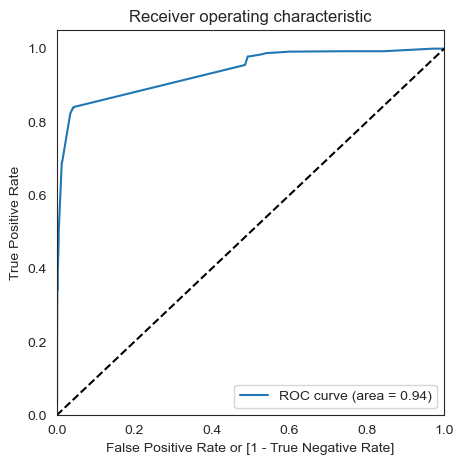

In [138]:
# To plot ROC
plot_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

In [139]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))


Area under curve:  0.9372728036078524


In [140]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1655   79]
 [ 157  832]]
Training Accuracy:  0.9133308850532501


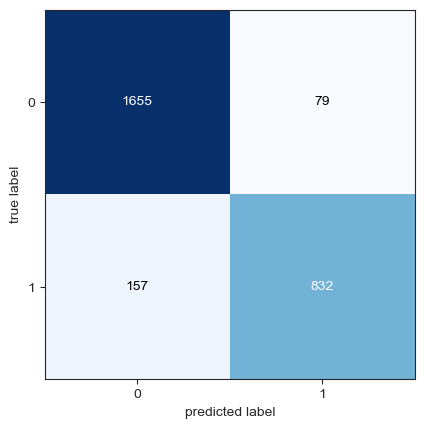

In [141]:
# To plot confusion matrix
plot_confusion_matrix(conf_mat=confusion_test)
plt.show()
     

In [142]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8412537917087968
Specificity:  0.9544405997693195
False postive rate:  0.04555940023068051
Positive predictive value:  0.9132821075740944
Negative predictive value:  0.9133554083885209


#### Classification Report

In [143]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1734
           1       0.91      0.84      0.88       989

    accuracy                           0.91      2723
   macro avg       0.91      0.90      0.90      2723
weighted avg       0.91      0.91      0.91      2723



## Step 9: Determining Feature Importance

#### Assigning Lead Score
* Lead Score = 100 * ConversionProbability This needs to be calculated for all the leads from the original dataset (train + test).

In [144]:
# To select test set
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.174329,0
1,1,1490,0.956791,1
2,0,7936,0.174329,0
3,1,4216,0.999078,1
4,0,3830,0.174329,0


In [145]:
# To select train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()
     

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.174329,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.429146,1012,0,1,1,1,1,1,0,0,0,0,0,1,1
2,0,0.000718,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.767691,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.975679,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [146]:
# To drop unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.174329,0
1,1012,0,0.429146,1
2,9226,0,0.000718,0
3,4750,1,0.767691,1
4,7987,1,0.975679,1


In [147]:
# To concatenate 2 datasets
lead_full_pred = pd.concat([leads_train_pred, leads_test_pred])
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.174329,0
1,1012,0,0.429146,1
2,9226,0,0.000718,0
3,4750,1,0.767691,1
4,7987,1,0.975679,1


In [148]:
# To inspect the shape of the final dataset
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [149]:
# To ensure uniqueness of Lead IDs
len(lead_full_pred['Lead ID'].unique().tolist())

9074

In [150]:
# To calculate the Lead Score
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.174329,0,17
1,1012,0,0.429146,1,43
2,9226,0,0.000718,0,0
3,4750,1,0.767691,1,77
4,7987,1,0.975679,1,98


In [151]:
# To make the Lead ID column as index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()
     

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.101213,0,10
1,0,0.000718,0,0
2,1,0.861477,1,86
3,0,0.000718,0,0
4,1,0.861477,1,86


In [152]:
# To get Lead Number column from original data
leads_original = lead_original[['Lead Number']]
leads_original.head()
    

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [153]:
# To concatenate the 2 dataframes based on index
leads_with_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_with_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0.0,0.101213,0.0,10.0
1,660728,0.0,0.000718,0.0,0.0
2,660727,1.0,0.861477,1.0,86.0
3,660719,0.0,0.000718,0.0,0.0
4,660681,1.0,0.861477,1.0,86.0


#### Evaluating Feature Importance 

In [154]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Lead Origin_Lead Add Form                               1.09
Lead Source_Welingak Website                            3.31
What is your current occupation_Working Professional    1.27
Tags_Busy                                               3.90
Tags_Closed by Horizzon                                 8.09
Tags_Lost to EINS                                       9.26
Tags_Ringing                                           -1.67
Tags_Will revert after reading the email                4.01
Tags_switched off                                      -2.34
Lead Quality_Not Sure                                  -3.38
Lead Quality_Worst                                     -3.83
Last Notable Activity_SMS Sent                          2.75
dtype: float64

In [155]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Origin_Lead Add Form                               11.73
Lead Source_Welingak Website                            35.76
What is your current occupation_Working Professional    13.72
Tags_Busy                                               42.09
Tags_Closed by Horizzon                                 87.34
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -18.06
Tags_Will revert after reading the email                43.33
Tags_switched off                                      -25.24
Lead Quality_Not Sure                                  -36.54
Lead Quality_Worst                                     -41.33
Last Notable Activity_SMS Sent                          29.71
dtype: float64

In [156]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Origin_Lead Add Form                               10
Lead Source_Welingak Website                             9
What is your current occupation_Working Professional     8
Tags_Busy                                                6
Tags_Closed by Horizzon                                  0
Tags_Lost to EINS                                        2
Tags_Ringing                                            11
Tags_Will revert after reading the email                 1
Tags_switched off                                        3
Lead Quality_Not Sure                                    7
Lead Quality_Worst                                       4
Last Notable Activity_SMS Sent                           5
dtype: int64

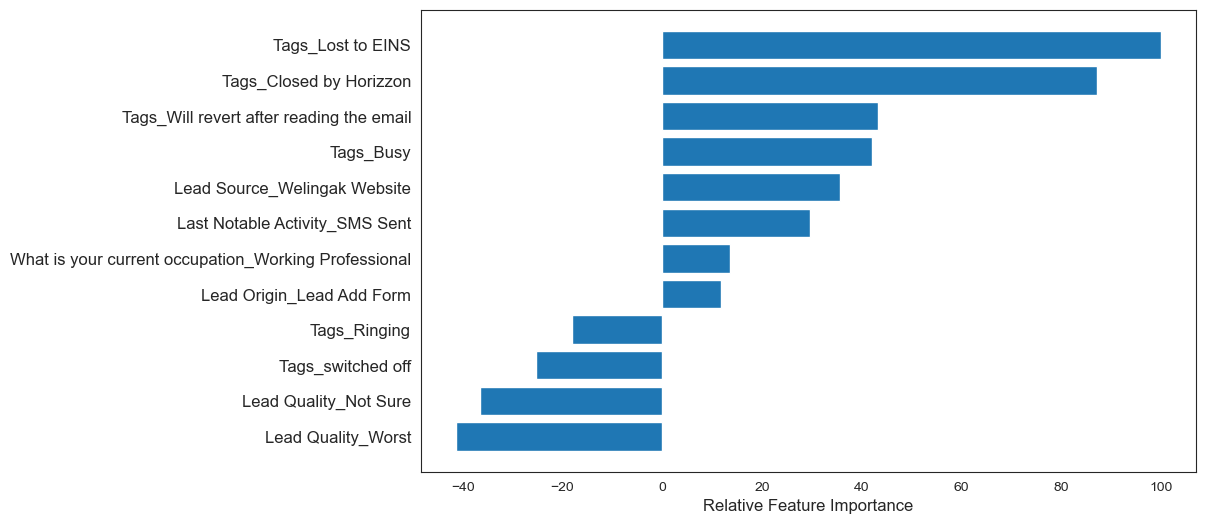

In [157]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col4].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

In [158]:
# Selecting Top 3 features which contribute most towards the probability of Lead Conversion 

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
5,Tags_Lost to EINS,100.00
4,Tags_Closed by Horizzon,87.34
7,Tags_Will revert after reading the email,43.33


In [159]:
# Selecting Top 3 features to focus on for improving lead conversion

pd.DataFrame(feature_importance).reset_index().sort_values(by=0).head(3)

,index,0
10,Lead Quality_Worst,-41.33
9,Lead Quality_Not Sure,-36.54
8,Tags_switched off,-25.24


### Conclusion:

Top 3 variables that contributing to Lead Conversion:
   * Tags_Lost to EINS
   * Tags_Closed by Horizzon
   * Tag_We will revert after reading the email

Top 3 Variables Requiring Improvement for Lead Conversion:
   * Lead Quality_ Worst
   * Lead Quality_Not Sure
   * Tags_switched off

  